In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import axis
rcParams['lines.linewidth'] = 3.9
rcParams['lines.markersize'] = 6
from scipy.integrate import odeint
from scipy import integrate
import sys
sys.path.insert(1, '../data_processing')
import os
from load_MA_data import *
from scipy.optimize import fmin
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import lmfit 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
def series_interp(data = []):
    y = [k for k in data if k >= 0]
    x = [i for i in range(len(data)) if data[i] >= 0 ]
    if 0 not in x:
        y = [0.00013] + y
        x = [0] + x
    f = interp1d(x,y,kind='linear',bounds_error=False)
    return [data[i] if data[i] >= 0 else f(i) for i in range(len(data))]

def window_avg(data = [], window = 1):
    avg = []
    for i in range(len(data)):
        if i < window:
            avg.append(np.mean(data[:i+1]))
        else:
            avg.append(np.mean(data[i-window+1:i+1]))
    return avg

DATA = {'cases': load_cases_by_date('../data/MA/raw'), 'hosp':load_hospitilization_from_hospitals('../data/MA/raw'), 'deaths':load_date_of_death('../data/MA/raw')}

pop = float(6.893*(10**6))
sdate = '4/1/2020' 
edate = '7/21/2020'

dates = DATA['cases']['date'][DATA['cases']['date'].index(sdate):DATA['cases']['date'].index(edate)]
dates = [datetime.strptime(i,"%m/%d/%Y").date() for i in dates]


cases_tot = np.array(DATA['cases']['cases_pos_tot'])[DATA['cases']['date'].index(sdate):DATA['cases']['date'].index(edate)]/pop
cases_tot = window_avg(series_interp(cases_tot))

hosp = [-1 for k in range(DATA['cases']['date'].index(DATA['hosp']['date'][0])-DATA['cases']['date'].index(sdate))] + list(np.array(DATA['hosp']['hosp_tot_today'])[:DATA['hosp']['date'].index(edate)] / pop)
hosp_total = window_avg(series_interp(hosp))

deaths_tot = np.array(DATA['deaths']['death_conf_tot'])[DATA['deaths']['date'].index(sdate):DATA['deaths']['date'].index(edate)] / pop
deaths_tot = window_avg(series_interp(deaths_tot))

Parameter Means and Standard Devations
alpha : 0.08830031836683447 | 0.05104325229969442
nu    : 0.005865936705636183 | 0.005003206836148456
mu    : 0.0013310815277463325 | 0.0009531250198161147
tau   : 0.033632536104517295 | 0.011877643301041862
['/Users/anthonybadea/Desktop/COVID19_Rapid_Testing/python', '../data_processing', '../data_processing', '/Users/anthonybadea/builddir/lib', '/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python37.zip', '/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7', '/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload', '', '/Users/anthonybadea/Library/Python/3.7/lib/python/site-packages', '/usr/local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/site-packages/taco.py-0.1a0-py3.7.egg', '/usr/local/lib/python3.7/site-packages/python_docx-0.8.10-py3.7.egg', '/usr/local/lib/python3.7/site-packages/lxml-4.4.1-py3.7-macosx-10.14-x86_

0.07142857142857142
['/Users/anthonybadea/Desktop/COVID19_Rapid_Testing/python', '../data_processing', '../data_processing', '../data_processing', '/Users/anthonybadea/builddir/lib', '/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python37.zip', '/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7', '/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload', '', '/Users/anthonybadea/Library/Python/3.7/lib/python/site-packages', '/usr/local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/site-packages/taco.py-0.1a0-py3.7.egg', '/usr/local/lib/python3.7/site-packages/python_docx-0.8.10-py3.7.egg', '/usr/local/lib/python3.7/site-packages/lxml-4.4.1-py3.7-macosx-10.14-x86_64.egg', '/usr/local/lib/python3.7/site-packages/IPython/extensions', '/Users/anthonybadea/.ipython']
/Users/anthonybadea/Desktop/COVID19_Rapid_Testing/python


[0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 5, 5, 5, 6, 9, 9, 10, 11, 12, 12, 14, 16, 19, 19, 19, 24, 24, 24, 26, 26, 27, 27, 28, 29, 29, 30, 31, 31, 31, 31, 31, 32, 33, 34, 35, 35, 37, 37, 40, 45, 45, 46, 46, 49, 50, 53, 55, 56, 56, 57, 58, 65, 69, 74, 75, 76, 79, 85, 91, 92, 96, 103, 104, 108, 110, 113, 115, 121, 125, 129, 132, 145, 149, 157, 162, 171, 175, 182, 194, 208, 227, 243, 255, 275, 290, 294, 305, 315, 335, 349, 361, 372, 383, 398, 407, 423, 437, 450, 466, 482, 501, 521, 543, 569, 597, 622, 637, 657, 676, 697, 722, 737, 766, 785, 810, 830, 853, 873, 896, 911, 929, 949, 965, 985, 1022, 1041, 1060, 1086, 1105, 1124, 1144, 1189, 1213, 1231, 1270, 1291, 1323, 1358, 1387, 1406, 1425, 1446, 1473, 1484, 1505, 1509, 1509] hospitalized
['3/12/2020', '3/13/2020', '3/14/2020', '3/15/2020', '3/16/2020', '3/17/2020', '3/18/2020', '3/19/2020', '3/20/2020', '3/21/2020', '3/22/2020', '3/23/2020', '3/24/2020', '3/25/2020', '3/26/2020', '3/27/2020', '3/28/2020', '3/29/2020', '3/30/2020', '3/31/2020', '4/1

['02/29/2020', '03/01/2020', '03/02/2020', '03/03/2020', '03/04/2020', '03/05/2020', '03/06/2020', '03/07/2020', '03/08/2020', '03/09/2020', '03/10/2020', '03/11/2020', '03/12/2020', '03/13/2020', '03/14/2020', '03/15/2020', '03/16/2020', '03/17/2020', '03/18/2020', '03/19/2020', '03/20/2020', '03/21/2020', '03/22/2020', '03/23/2020', '03/24/2020', '03/25/2020', '03/26/2020', '03/27/2020', '03/28/2020', '03/29/2020', '03/30/2020', '03/31/2020', '04/01/2020', '04/02/2020', '04/03/2020', '04/04/2020', '04/05/2020', '04/06/2020', '04/07/2020', '04/08/2020', '04/09/2020', '04/10/2020', '04/11/2020', '04/12/2020', '04/13/2020', '04/14/2020', '04/15/2020', '04/16/2020', '04/17/2020', '04/18/2020', '04/19/2020', '04/20/2020', '04/21/2020', '04/22/2020', '04/23/2020', '04/24/2020', '04/25/2020', '04/26/2020', '04/27/2020', '04/28/2020', '04/29/2020', '04/30/2020', '05/01/2020', '05/02/2020', '05/03/2020', '05/04/2020', '05/05/2020', '05/06/2020', '05/07/2020', '05/08/2020', '05/09/2020', '05/1

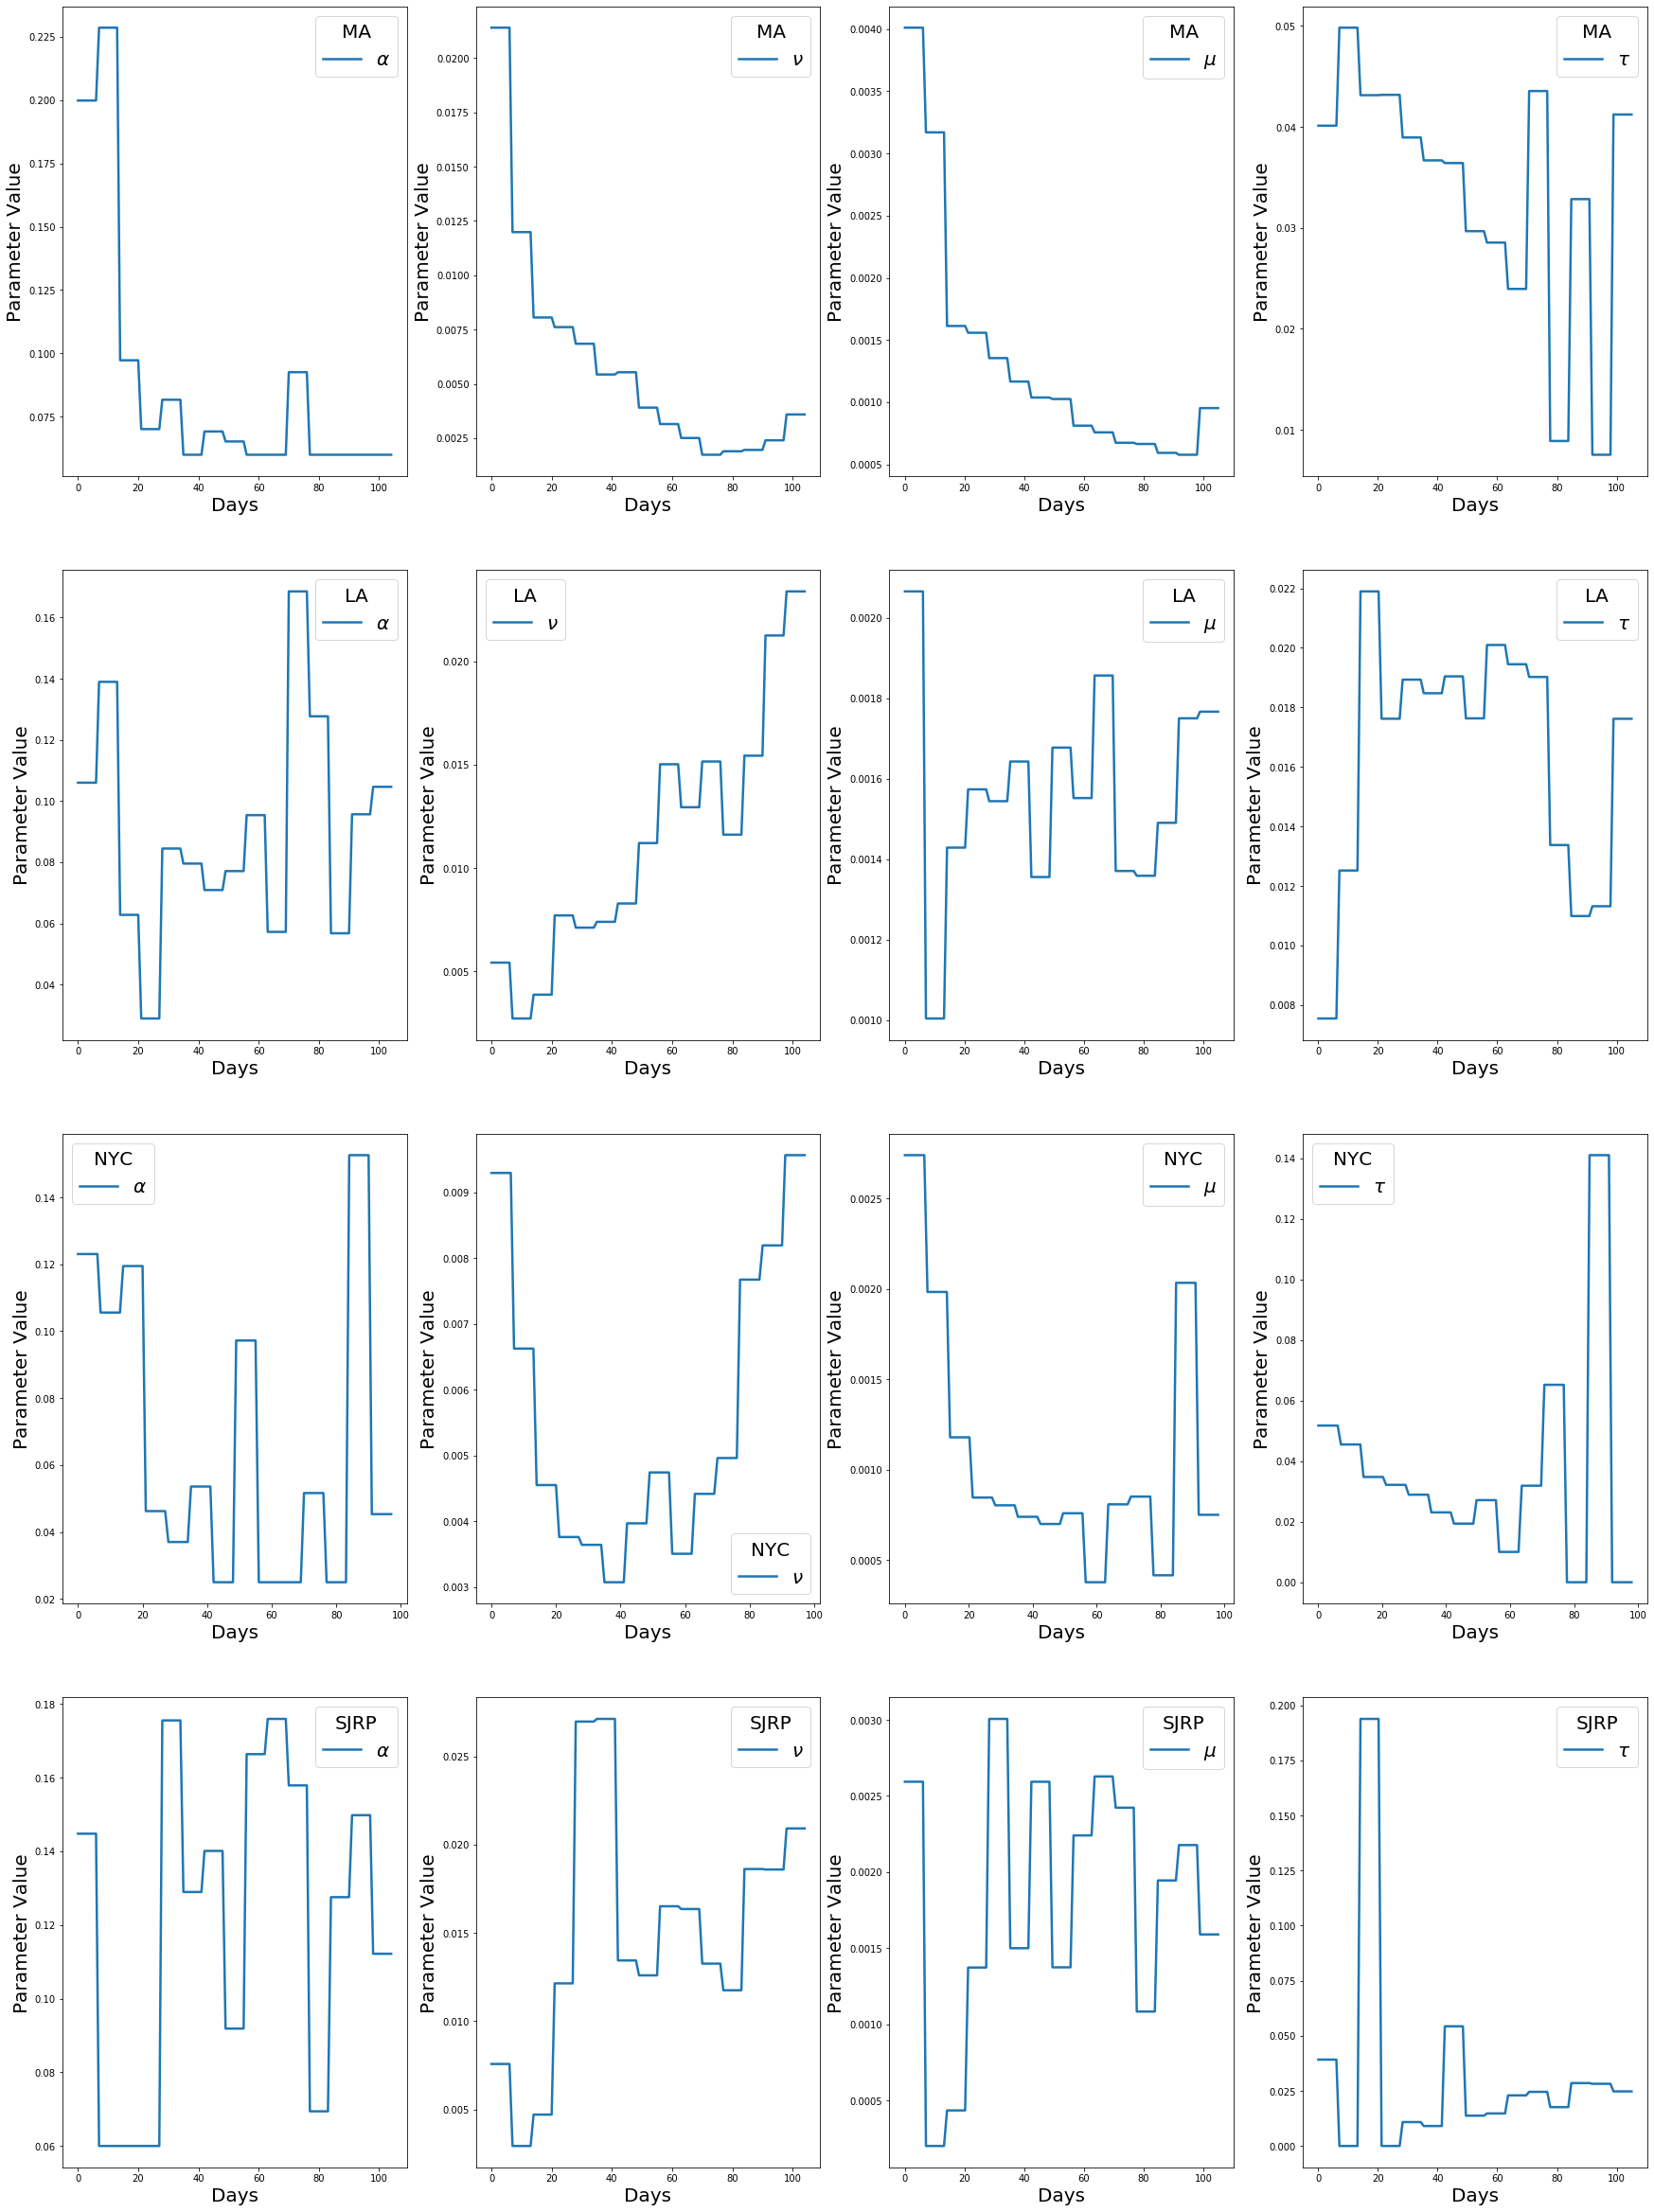

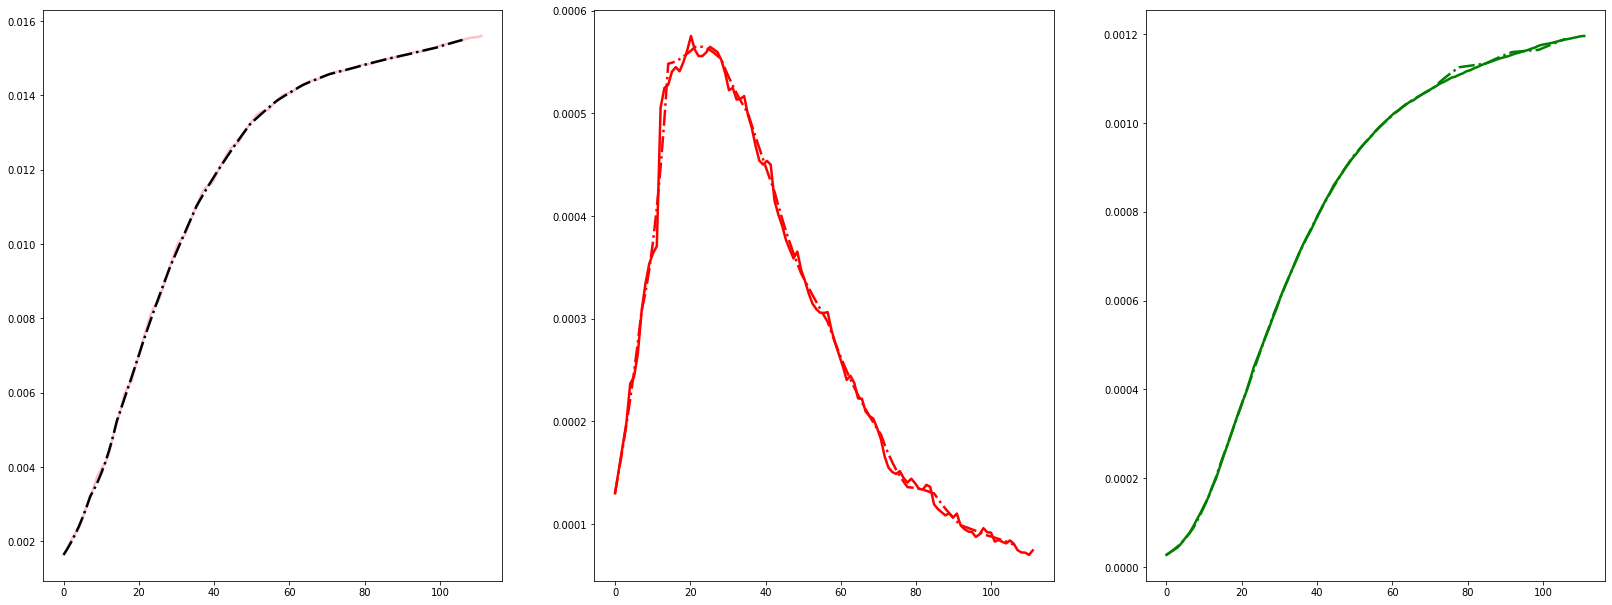

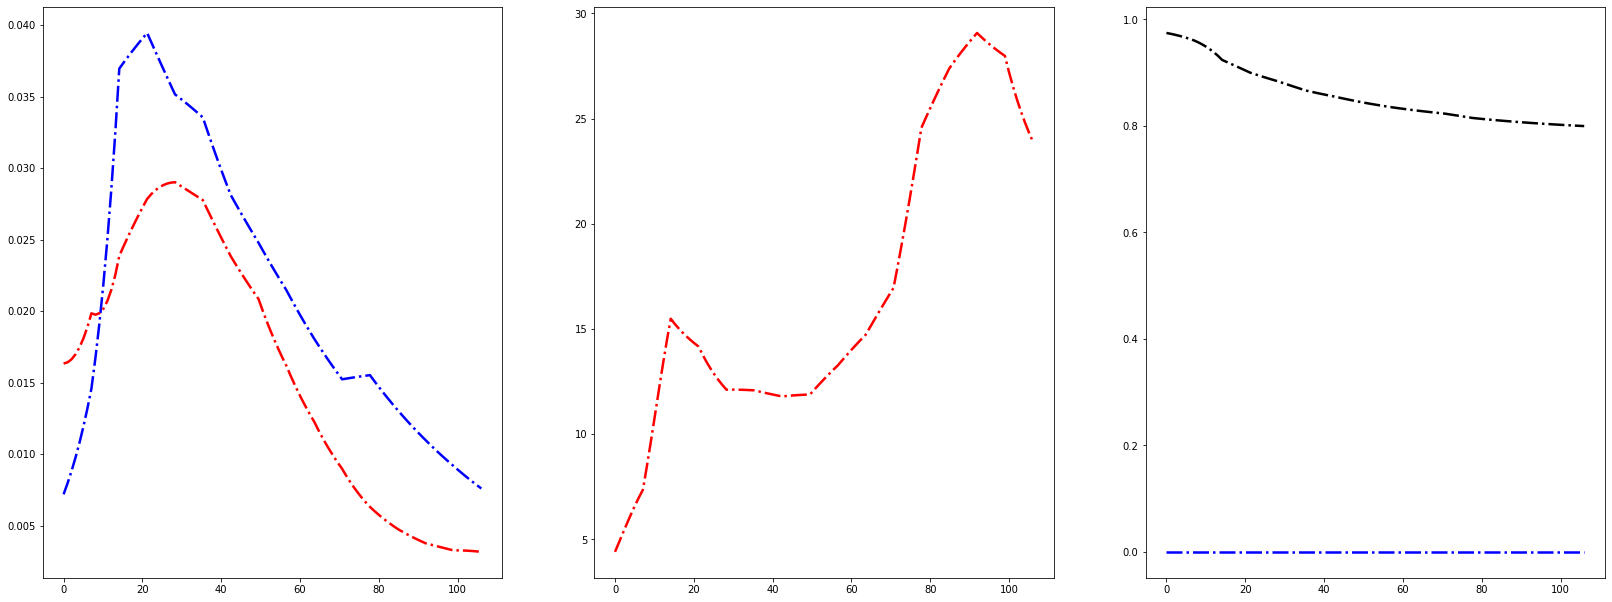

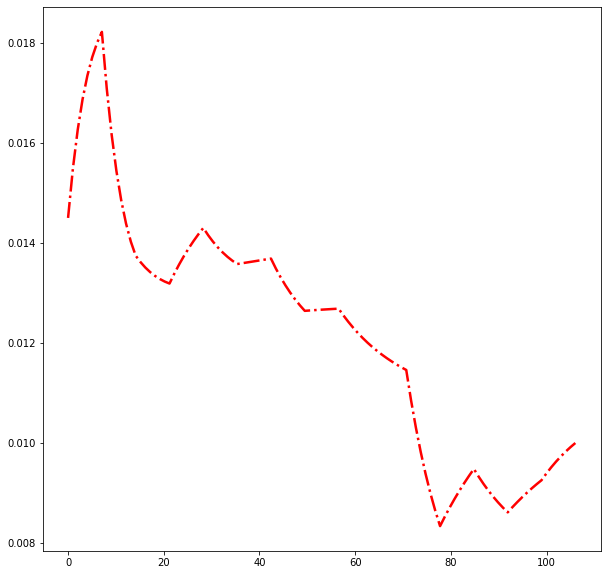

In [3]:
# ratio undetected/detected infected (I/D)
phi = 11
# ratio of transmition rate for detected / undetected
eta_to_alpha = 0.01
# link Quarantine Undetected to S
q_time = 14.0
psi = 1/q_time
# Link Undetected Infected to Recovered
ud_time_recov = 14.0
lambd = 1/ud_time_recov
# Link Detected Infected to Hospitalized
d_time_recov = 14.0
rho = 1/d_time_recov
# Link Hospitalized to Recovered
hosp_los_recov = 14.0
sigma = 1/hosp_los_recov
# Used to Link Hospitalized to Dead
hosp_los_fat = 10.0
hosp_fat_rate = 0.346
tau = hosp_fat_rate/hosp_los_fat
# Ratio of infected detected to recovered
rRD = 10.0

def funct(y,par,dt=1.0):

    # Load parameter values
    S,Qu,I,D,H,R,QR,E,tot,total = y
    # Fit varying parameter values
    #beta = par['beta'].value
    alpha = par['alpha'].value
    eta   = eta_to_alpha*alpha
    eps   = par['eps'].value
    mu    = par['mu'].value
    tau   = par['tau'].value
    nu    = par['nu'].value
    # testing features
    freq = par['freq'].value
    sensitivity = par['sens'].value
    specificity = par['spec'].value
    if freq*sensitivity != 0:
        eps = freq*sensitivity
    if sensitivity != 0:
        nu *= sensitivity
    # link S to Quarantine Undetected
    gamma = freq*(1-specificity)
    
    if(round(S + Qu + I + D + H + R + QR + E) != 1.0): 
        print("Population not conserved")
        print([s for s in y])
        
    
    
    for k in range(100):
        dt = 1/100
        Sn   = S   + dt*(-eta*S*D            - alpha*S*I       - gamma*S         + psi*Qu)
        Qun  = Qu  + dt*(gamma*S             - psi*Qu)
        totn = tot + dt*((nu)*I)
        In   = I   + dt*(-(eps+nu+lambd)*I   + eta*S*D         + alpha*S*I)
        Dn   = D   + dt*((eps+nu)*I          - rho*D           - mu*(I+D))
        Hn   = H   + dt*(mu*(I+D)            - (sigma+tau)*H)
        Rn   = R   + dt*(rho*D               + lambd*I         + sigma*H         - gamma*R       + psi*QR)
        QRn  = QR  + dt*(gamma*R             - psi*QR)
        En   = E   + dt*(tau*H)
        totaln = total + dt*(eta*S*D         + alpha*S*I)
        S, Qu, I, D, H, R, QR, E, tot,total = Sn, Qun, In, Dn, Hn, Rn, QRn, En, totn,totaln

    return [S, Qu, I, D, H, R, QR, E, tot,total]

def resid(par,y=[],tot=[],H=[],E=[],Phi=[],window=1):
    Sn, Qun, In, Dn, Hn, Rn, QRn, En, totn, totaln = funct(y,par)
    residual = []
    for r in range(window):
        residual += list([10*(tot[r] - totn)/(tot[r]+10**-50), 10*(H[r] - Hn)/(H[r]+10**-50), 10*(E[r] - En)/(E[r]+10**-50), (0.0145 - (Hn)/(In+Dn+Hn+10**-50))/0.0145])
        y = [Sn, Qun, In, Dn, Hn, Rn, QRn, En, totn,totaln]
        Sn, Qun, In, Dn, Hn, Rn, QRn, En, totn, totaln = funct(y,par)
    residual = np.array(residual)
    #print(residual)
    return residual.ravel()

def get_PD(window=1):

    PD = {'beta':[],'alpha':[],'eps':[],'mu':[],'nu':[],'tau':[],'chisqr':[],'S':[],'Qu':[],'I':[],'D':[],'H':[],'R':[],'QR':[],'E':[],'tot':[],'total':[]}
    i = 0

    while i < len(cases_tot)-window:
        if i == 0:
            Qu0 = 0
    #         I0 = 30*cases_tot[i]
            D0 = cases_tot[i]
            H0 = hosp_total[i]
            R0 = rRD*cases_tot[i]
            QR0 = 0
            E0 = deaths_tot[i]
            I0 = (H0-0.0145*(H0+D0))/(0.0145)
            S0 = 1 - Qu0 - I0 - D0 - H0 - R0 - QR0 - E0
            tot0 = D0
            total0 = I0 + D0

            prev_step = [S0, Qu0, I0, D0, H0, R0, QR0, E0, tot0,total0]
            PD['S'].append(S0)
            PD['Qu'].append(Qu0)
            PD['I'].append(I0)
            PD['D'].append(D0)
            PD['H'].append(H0)
            PD['R'].append(R0)
            PD['QR'].append(QR0)
            PD['E'].append(E0)
            PD['tot'].append(tot0)
            PD['total'].append(total0)
                
        if i > 0:
            prev_step = [PD['S'][-1],PD['Qu'][-1],PD['I'][-1],PD['D'][-1],PD['H'][-1],PD['R'][-1],PD['QR'][-1],PD['E'][-1],PD['tot'][-1],PD['total'][-1]]
            
        params = lmfit.Parameters()
        #params.add('beta'  , 1.00  , min=0.5, max=2.5  )
        params.add('alpha' , 0.1         , min=0.06, max=1.0 )
        params.add('eps'   , 0.0          , vary=False        )
        params.add('nu'    , 0.17       , min=0.0,max=1.0 )
        params.add('mu'    , 0.008        , min=0.0,max=1.0 )
        params.add('tau'   , 0.05       , min=0.0, max=1.0  )
        params.add('freq'  , 0.0          , vary=False        )
        params.add('sens'  , 0.0          , vary=False        )
        params.add('spec'  , 0.0          , vary=False        )   
        
        
        result = lmfit.minimize(resid, params, args=(prev_step, cases_tot[i+1:i+1+window], hosp_total[i+1:i+1+window], deaths_tot[i+1:i+1+window], [phi for p in range(window)], window),method='leastsq',**{'max_nfev':10000,'epsfcn':1e-7})
    #     result = lmfit.minimize(resid, params, args=(prev_step, cases_tot[i+1], hosp_total[i+1], deaths_tot[i+1], phi, window),method='least_squares',**{'max_nfev':50000})
        #PD['beta'].append(result.params['beta'])
        
        # evaluate model
        for p in range(window):
            if len(PD['S']) < len(cases_tot):
                S,Qu,I,D,H,R,QR,E,tot,total = funct(prev_step,result.params)
                #print(cases_tot[i+1],tot,hosp_total[i+1],H,deaths_tot[i+1],E)
                PD['S'].append(S)
                PD['Qu'].append(Qu)
                PD['I'].append(I)
                PD['D'].append(D)
                PD['H'].append(H)
                PD['R'].append(R)
                PD['QR'].append(QR)
                PD['E'].append(E)
                PD['tot'].append(tot)
                PD['total'].append(total)
                PD['alpha'].append(result.params['alpha'])
                PD['nu'].append(result.params['nu'])
                PD['mu'].append(result.params['mu'])
                PD['tau'].append(result.params['tau'])
                PD['chisqr'].append(result.chisqr)
                prev_step = [S,Qu,I,D,H,R,QR,E,tot,total]
        i += window
    return PD

PD = get_PD(7)
print("Parameter Means and Standard Devations")
print("alpha : {} | {}".format(np.mean(PD['alpha']), np.std(PD['alpha'])))
print("nu    : {} | {}".format(np.mean(PD['nu']), np.std(PD['nu'])))
print("mu    : {} | {}".format(np.mean(PD['mu']), np.std(PD['mu'])))
print("tau   : {} | {}".format(np.mean(PD['tau']), np.std(PD['tau'])))
def run_avg(x, wind=1):
    avg = []
    for i in range(len(x)):
        if i >= np.floor(wind/2) and i < np.ceil(len(x) - wind/2):
            avg.append(np.mean(x[int(i+np.floor(-wind/2+1)):int(i+np.floor(wind/2+1))]))
        elif i < wind/2:
            avg.append(np.mean(x[:int(i+wind/2+1)]))
        else:
            avg.append(np.mean(x[int(i-wind/2+1):]))
    return avg

import ftdLA, ftdBrazil, ftdNYC

    
fig, ((ax1, ax2, ax3, ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16)) = plt.subplots(4, 4)
fig.set_size_inches(30.0, 4*10.5)
x = np.linspace(0,len(PD['mu']), len(PD['mu']))
ax1.plot(PD['alpha'],label=r"$\alpha$")
ax1.set_xlabel("Days",fontsize=20)
ax1.set_ylabel("Parameter Value",fontsize=20)
ax1.legend(title='MA',title_fontsize=20,fontsize=20)
ax2.plot(PD['nu'],label=r"$\nu$")
ax2.set_xlabel("Days",fontsize=20)
ax2.set_ylabel("Parameter Value",fontsize=20)
ax2.legend(title='MA',title_fontsize=20,fontsize=20)
ax3.plot(x,PD['mu'],label=r"$\mu$")
ax3.set_xlabel("Days",fontsize=20)
ax3.set_ylabel("Parameter Value",fontsize=20)
ax3.legend(title='MA',title_fontsize=20,fontsize=20)
ax4.plot(x,PD['tau'],label=r"$\tau$")
ax4.set_xlabel("Days",fontsize=20)
ax4.set_ylabel("Parameter Value",fontsize=20)
ax4.legend(title='MA',title_fontsize=20,fontsize=20)

print("MA, tau: ",np.mean(PD['tau']),np.std(PD['tau']))
print("MA, alpha: ", np.mean(PD['alpha']),np.std(PD['alpha']))
print("MA, nu: ", np.mean(PD['nu']),np.std(PD['nu']))
print("MA, mu: ", np.mean(PD['mu']),np.std(PD['mu']))
print("MA, total:",max(PD['total']))
print("MA, max h:",max(PD['H']))
print("MA, max e:",max(PD['E']))


PD_LA = ftdLA.get_PD(7)
x = np.linspace(0,len(PD_LA['mu']), len(PD_LA['mu']))
ax5.plot(PD_LA['alpha'],label=r"$\alpha$")
ax5.set_xlabel("Days",fontsize=20)
ax5.set_ylabel("Parameter Value",fontsize=20)
ax5.legend(title='LA',title_fontsize=20,fontsize=20)
ax6.plot(PD_LA['nu'],label=r"$\nu$")
ax6.set_xlabel("Days",fontsize=20)
ax6.set_ylabel("Parameter Value",fontsize=20)
ax6.legend(title='LA',title_fontsize=20,fontsize=20)
ax7.plot(x,PD_LA['mu'],label=r"$\mu$")
ax7.set_xlabel("Days",fontsize=20)
ax7.set_ylabel("Parameter Value",fontsize=20)
ax7.legend(title='LA',title_fontsize=20,fontsize=20)
ax8.plot(x,PD_LA['tau'],label=r"$\tau$")
ax8.set_xlabel("Days",fontsize=20)
ax8.set_ylabel("Parameter Value",fontsize=20)
ax8.legend(title='LA',title_fontsize=20,fontsize=20)

print("LA, tau: ",np.mean(PD_LA['tau']),np.std(PD_LA['tau']))
print("LA, alpha: ", np.mean(PD_LA['alpha']),np.std(PD_LA['alpha']))
print("LA, nu: ", np.mean(PD_LA['nu']),np.std(PD_LA['nu']))
print("LA, mu: ", np.mean(PD_LA['mu']),np.std(PD_LA['mu']))
print("LA, total:",max(PD_LA['total']))
print("LA, max h:",max(PD_LA['H']))
print("LA, max e:",max(PD_LA['E']))

PD_NYC = ftdNYC.get_PD(7)

x = np.linspace(0,len(PD_NYC['mu']), len(PD_NYC['mu']))
ax9.plot(PD_NYC['alpha'],label=r"$\alpha$")
ax9.set_xlabel("Days",fontsize=20)
ax9.set_ylabel("Parameter Value",fontsize=20)
ax9.legend(title='NYC',title_fontsize=20,fontsize=20)
ax10.plot(PD_NYC['nu'],label=r"$\nu$")
ax10.set_xlabel("Days",fontsize=20)
ax10.set_ylabel("Parameter Value",fontsize=20)
ax10.legend(title='NYC',title_fontsize=20,fontsize=20)
ax11.plot(x,PD_NYC['mu'],label=r"$\mu$")
ax11.set_xlabel("Days",fontsize=20)
ax11.set_ylabel("Parameter Value",fontsize=20)
ax11.legend(title='NYC',title_fontsize=20,fontsize=20)
ax12.plot(x,PD_NYC['tau'],label=r"$\tau$")
ax12.set_xlabel("Days",fontsize=20)
ax12.set_ylabel("Parameter Value",fontsize=20)
ax12.legend(title='NYC',title_fontsize=20,fontsize=20)

print("NYC, tau: ",np.mean(PD_NYC['tau']),np.std(PD_NYC['tau']))
print("NYC, alpha: ", np.mean(PD_NYC['alpha']),np.std(PD_NYC['alpha']))
print("NYC, nu: ", np.mean(PD_NYC['nu']),np.std(PD_NYC['nu']))
print("NYC, mu: ", np.mean(PD_NYC['mu']),np.std(PD_NYC['mu']))
print("NYC, total:",max(PD_NYC['total']))
print("NYC, max h:",max(PD_NYC['H']))
print("NYC, max e:",max(PD_NYC['E']))

PD_Brazil = ftdBrazil.get_PD(7)


x = np.linspace(0,len(PD_Brazil['mu']), len(PD_Brazil['mu']))
ax13.plot(PD_Brazil['alpha'],label=r"$\alpha$")
ax13.set_xlabel("Days",fontsize=20)
ax13.set_ylabel("Parameter Value",fontsize=20)
ax13.legend(title='SJRP',title_fontsize=20,fontsize=20)
ax14.plot(PD_Brazil['nu'],label=r"$\nu$")
ax14.set_xlabel("Days",fontsize=20)
ax14.set_ylabel("Parameter Value",fontsize=20)
ax14.legend(title='SJRP',title_fontsize=20,fontsize=20)
ax15.plot(x,PD_Brazil['mu'],label=r"$\mu$")
ax15.set_xlabel("Days",fontsize=20)
ax15.set_ylabel("Parameter Value",fontsize=20)
ax15.legend(title='SJRP',title_fontsize=20,fontsize=20)
ax16.plot(x,PD_Brazil['tau'],label=r"$\tau$")
ax16.set_xlabel("Days",fontsize=20)
ax16.set_ylabel("Parameter Value",fontsize=20)
ax16.legend(title='SJRP',title_fontsize=20,fontsize=20)


print("Brazil, tau: ",np.mean(PD_Brazil['tau']),np.std(PD_Brazil['tau']))
print("Brazil, alpha: ", np.mean(PD_Brazil['alpha']),np.std(PD_Brazil['alpha']))
print("Brazil, nu: ", np.mean(PD_Brazil['nu']),np.std(PD_Brazil['nu']))
print("Brazil, mu: ", np.mean(PD_Brazil['mu']),np.std(PD_Brazil['mu']))
print("Brazil, total:",max(PD_Brazil['total']))
print("Brazil, max h:",max(PD_Brazil['H']))
print("Brazil, max e:",max(PD_Brazil['E']))
plt.savefig('grid_fits',bbox_inches="tight") 

plt.show()

fig, (ax5,ax6,ax7) = plt.subplots(1, 3)
fig.set_size_inches(28.0, 10.5)
x = np.linspace(0,len(cases_tot), len(cases_tot))
z = np.linspace(0,len(PD['S']), len(PD['S']))
ax5.plot(x,cases_tot,color='pink')
ax5.plot(z,PD['tot'],linestyle='dashdot',color='black')
ax6.plot(x,hosp_total,color='red')
ax6.plot(z,PD['H'],linestyle='dashdot',color='red')
ax7.plot(x,deaths_tot,color='green')
ax7.plot(z,PD['E'],linestyle='dashdot',color='green')
plt.show()

fig, (ax8,ax9,ax10) = plt.subplots(1, 3)
fig.set_size_inches(28.0, 10.5)
ax8.plot(z,PD['I'],linestyle='dashdot',color='blue')
ax8.plot(z,10*np.array(PD['D']),linestyle='dashdot',color='red')
# ax8.plot(x,PD['R'],linestyle='dashdot',color='green')
# ax8.plot(x,PD['QR'],linestyle='dashdot',color='blue')
ax9.plot(z,np.array(PD['I'])/np.array(PD['D']),linestyle='dashdot',color='red')
ax10.plot(z,PD['S'],linestyle='dashdot',color='black')
ax10.plot(z,PD['Qu'],linestyle='dashdot',color='blue')
plt.show()
plt.close()

fig = plt.figure(figsize=(10,10))
plt.plot(z,np.array(PD['H'])/(np.array(PD['I'])+np.array(PD['D'])+np.array(PD['H'])),linestyle='dashdot',color='red')
plt.show()
# plt.plot(x,PD['E']/(PD['I']+PD['D']+PD['H']),linestyle='dashdot',color='red')

In [4]:
sdate = '4/1/2020'
sdate = datetime.strptime(sdate,"%m/%d/%Y").date()
model_dates = []
tick_dates = []
for i in range(1,len(cases_tot)+1):
    day = sdate + timedelta(days=i)
    model_dates.append(i)
    if(i%30 ==0):
        tick_dates.append(i)

import ftdLA

sdateLA = '04/01/2020'
sdateLA = datetime.strptime(sdateLA,"%m/%d/%Y").date()
model_dates_LA = []
tick_dates_LA = []
for i in range(1,len(ftdLA.cases_tot)+1):
    day = sdateLA + timedelta(days=i)
    model_dates_LA.append(i)
    if(i%30 ==0):
        tick_dates_LA.append(i)


        


import ftdNYC

sdateNYC = '04/01/2020'
sdateNYC = datetime.strptime(sdateNYC,"%m/%d/%Y").date()
model_dates_NYC = []
tick_dates_NYC = []
for i in range(1,len(ftdNYC.cases_tot)+1):
    day = sdateNYC + timedelta(days=i)
    model_dates_NYC.append(i)
    if(i%30 ==0):
        tick_dates_NYC.append(i)
        

import ftdBrazil

sdateBrazil = '4/1/2020'
sdateBrazil = datetime.strptime(sdateBrazil,"%m/%d/%Y").date()
model_dates_Brazil = []
tick_dates_Brazil = []
for i in range(1,len(ftdBrazil.cases_tot)+1):
    day = sdateBrazil + timedelta(days=i)
    model_dates_Brazil.append(i)
    if(i%30 ==0):
        tick_dates_Brazil.append(i)

def make_fig_dates(f=None,ax=None,place='MA'):
    if place =='MA':
        tick_dates2 = tick_dates
    elif place == 'LA':
        tick_dates2 = tick_dates_LA
    elif place == 'NYC':
        tick_dates2 = tick_dates_NYC
    elif place == 'Brazil':
        tick_dates2 = tick_dates_Brazil
    if f == None:
        f = plt.figure(figsize=(10,10))
    if ax == None:
        ax = f.add_subplot(111)
#     formatter = mdates.DateFormatter("%Y-%m-%d")
#     locator = mdates.MonthLocator()
#     locator_days = mdates.DayLocator()
#     ax.xaxis.set_major_formatter(formatter)
#     ax.xaxis.set_major_locator(locator)
    ax.set_xlabel("Days",fontsize=28,labelpad=4)
    ax.xaxis.set_ticks(tick_dates)
#     ax.xaxis.set_tick_params(rotation=45)
    ax.set_ylabel("Percent of Population (%)",fontsize=28,labelpad=4)
    ax.tick_params(labelsize=26, direction='out', length=12, width=2)
    #ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0),useMathText=True)
    ax.yaxis.offsetText.set_fontsize(26)
#     ax.set_prop_cycle(color=['#aec7e8',
#     '#1f77b4', '#d62728', '#ff7f0e', '#ffbb78','#98df8a', '#2ca02c', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
#     '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
#     '#17becf', '#9edae5'])

    ax.set_prop_cycle(color=['#FF0061','#FF8913','#59FF00','#1CFFE0','#0097FF','#002BFF','#A15FFF','#CD7BFF'])
    return f,ax

def make_fig(f=None,ax=None,place='MA'):
    if f == None:
        f = plt.figure(figsize=(10,10))
    if ax == None:
        ax = f.add_subplot(111)
    ax.set_xlabel("Frequency (1/Days Between Tests)",fontsize=26,labelpad=6)
    ax.set_ylabel("Percent of Population (%)",fontsize=26)
    ax.tick_params(labelsize=18, direction='out', length=8, width=2)
#     ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0),useMathText=True)
    ax.yaxis.offsetText.set_fontsize(18)
    ax.set_prop_cycle(color=['#59FF00','#1CFFE0','#0097FF','#002BFF','#A15FFF','#FF0061','#FF8913'])
    return f,ax

In [5]:
def get_states(freq=1/7,sens=0.8,spec=0.8, wind=1,window=7,PD=None):
    
    if PD is None:
        PD = get_PD(window)
    else:
        PD = PD
    
    SD = {'S':[],'Qu':[],'I':[],'D':[],'H':[],'R':[],'QR':[],'E':[],'tot':[],'total':[]}
    
    alphas = run_avg(PD['alpha'],wind)
    taus = run_avg(PD['tau'],wind)
    nus = run_avg(PD['nu'],wind)
    mus = run_avg(PD['mu'],wind)
    
    for i in range(len(cases_tot)-window):
        prev_step = []
        if i == 0:
            S0   = PD['S'][0]
            Qu0  = PD['Qu'][0]
            I0   = PD['I'][0]
            D0   = PD['D'][0]
            H0   = PD['H'][0]
            R0   = PD['R'][0]
            QR0  = PD['QR'][0]
            E0   = PD['E'][0]
            tot0 = PD['tot'][0]
            total0 = PD['total'][0]
            prev_step = [S0, Qu0, I0, D0, H0, R0, QR0, E0, tot0,total0]
            
            SD['S'].append(S0)
            SD['Qu'].append(Qu0)
            SD['I'].append(I0)
            SD['D'].append(D0)
            SD['H'].append(H0)
            SD['R'].append(R0)
            SD['QR'].append(QR0)
            SD['E'].append(E0)
            SD['tot'].append(tot0)
            SD['total'].append(total0)
        if i > 0: 
            prev_step = [SD['S'][-1],SD['Qu'][-1],SD['I'][-1],SD['D'][-1],SD['H'][-1],SD['R'][-1],SD['QR'][-1],SD['E'][-1],SD['tot'][-1],SD['total'][-1]]
        params = lmfit.Parameters()
        
        
        params.add('alpha' ,   alphas[i], vary=False)
        params.add('eps'   ,  0      , vary=False)
        params.add('nu'    ,   nus[i]                                               , vary=False)
        params.add('mu'    ,   mus[i]                                              , vary=False)
        params.add('tau'   ,   taus[i]                                             , vary=False)
        params.add('freq'  , freq            , vary=False)
        params.add('sens'  , sens            , vary=False)
        params.add('spec'  , spec            , vary=False)

        # evaluate model
        S,Qu,I,D,H,R,QR,E,tot,total = funct(prev_step,params)

        #print(cases_tot[i+1],tot,hosp_total[i+1],H,deaths_tot[i+1],E)
        SD['S'].append(S)
        SD['Qu'].append(Qu)
        SD['I'].append(I)
        SD['D'].append(D)
        SD['H'].append(H)
        SD['R'].append(R)
        SD['QR'].append(QR)
        SD['E'].append(E)
        SD['tot'].append(tot)
        SD['total'].append(total)
    return SD



In [6]:

ss = [0.8]
sps = [0.9]

# ss =  [0.8]
# sps = [0.9]

windows = [7]

scan_all_MA = {}
scan_all_LA = {}
scan_all_NYC = {}
scan_all_Brazil = {}

for w in windows:
    
    PD = get_PD(w)
    PD_LA = ftdLA.get_PD(w)
    PD_NYC = ftdNYC.get_PD(w)
    PD_Brazil = ftdBrazil.get_PD(w)

    for sens in ss:
        if sens not in scan_all_MA:
            scan_all_MA[sens] = {}
            scan_all_LA[sens] = {}
            scan_all_NYC[sens] = {}
            scan_all_Brazil[sens] = {}
            
        for spec in sps:
            if spec not in scan_all_MA[sens]:
                scan_all_MA[sens][spec]= {w:{}}
                scan_all_LA[sens][spec] = {w:{}}
                scan_all_NYC[sens][spec] = {w:{}}
                scan_all_Brazil[sens][spec] = {w:{}}
            # plot output directory
            outDir = '../'
            # Geographical location of analysis 
            place = 'MA'
            # convert all decimals to percents
            toPerc = 100
            # testing frequencies
            freqs = [0,1,1/3,1/7,1/14,1/21]
            # Price of E25Bio test
            price = 7

            scan = {}
            pcd  = {}

            for freq in freqs:
                if freq not in scan.keys():
                    scan[freq] = {'S':[],'Qu':[],'I':[],'D':[],'I+D':[],'H':[],'R':[],'QR':[],'E':[],'tot':[],'total':[], 'cost':[]}
                SD = get_states(freq=freq,sens=sens,spec=spec,window=w,PD=PD)
                scan[freq]['S']     = np.array(SD['S'])  * toPerc    
                scan[freq]['Qu']    = np.array(SD['Qu']) * toPerc    
                scan[freq]['I']     = np.array(SD['I'])  * toPerc    
                scan[freq]['D']     = np.array(SD['D'])  * toPerc    
                scan[freq]['I+D']   = (np.array(SD['D']) + np.array(SD['I'])) * toPerc 
                scan[freq]['H']     = np.array(SD['H'])  * toPerc    
                scan[freq]['R']     = np.array(SD['R'])  * toPerc
                scan[freq]['QR']    = np.array(SD['QR']) * toPerc    
                scan[freq]['E']     = np.array(SD['E'])  * toPerc
                scan[freq]['tot']   = np.array(SD['tot']) * toPerc   
                scan[freq]['total'] = np.array(SD['total']) * toPerc
                print("MA",freq)
                print('I+D',max(scan[freq]['I+D']),scan[freq]['I+D'][-1],scan[freq]['I+D'][0])
                print('D',max(scan[freq]['D']),scan[freq]['D'][-1],scan[freq]['D'][0])
                print('E',max(scan[freq]['E']),scan[freq]['E'][-1],scan[freq]['E'][0])
                print('tot',max(scan[freq]['tot']),scan[freq]['tot'][-1],scan[freq]['tot'][0])
                print('total',max(scan[freq]['total']),scan[freq]['total'][-1],scan[freq]['total'][0])
                print('Qu',max(scan[freq]['Qu']),scan[freq]['Qu'][-1],scan[freq]['Qu'][0])
                print('QR',max(scan[freq]['QR']),scan[freq]['QR'][-1],scan[freq]['QR'][0])
                print('H',max(scan[freq]['H']),scan[freq]['H'][-1],scan[freq]['H'][0])


            scanLA = {}
            pcd  = {}

            for freq in freqs:
                if freq not in scanLA.keys():
                    scanLA[freq] = {'S':[],'Qu':[],'I':[],'D':[],'I+D':[],'H':[],'R':[],'QR':[],'E':[],'tot':[],'total':[], 'cost':[]}
                SD = ftdLA.get_states(freq=freq,sens=sens,spec=spec,window=w,PD=PD_LA)
                scanLA[freq]['S']     = np.array(SD['S'])  * toPerc    
                scanLA[freq]['Qu']    = np.array(SD['Qu']) * toPerc
                scanLA[freq]['I']     = np.array(SD['I'])  * toPerc    
                scanLA[freq]['D']     = np.array(SD['D'])  * toPerc    
                scanLA[freq]['I+D']   = (np.array(SD['D']) + np.array(SD['I'])) * toPerc 
                scanLA[freq]['H']     = np.array(SD['H'])  * toPerc    
                scanLA[freq]['R']     = np.array(SD['R'])  * toPerc
                scanLA[freq]['QR']    = np.array(SD['QR']) * toPerc    
                scanLA[freq]['E']     = np.array(SD['E'])  * toPerc    
                scanLA[freq]['tot']   = np.array(SD['tot']) * toPerc   
                scanLA[freq]['total'] = np.array(SD['total']) * toPerc 
                print("LA",freq)
                print('I+D',max(scanLA[freq]['I+D']),scanLA[freq]['I+D'][-1],scanLA[freq]['I+D'][0])
                print('D',max(scanLA[freq]['D']),scanLA[freq]['D'][-1],scanLA[freq]['D'][0])
                print('E',max(scanLA[freq]['E']),scanLA[freq]['E'][-1],scanLA[freq]['E'][0])
                print('tot',max(scanLA[freq]['tot']),scanLA[freq]['tot'][-1],scanLA[freq]['tot'][0])
                print('total',max(scanLA[freq]['total']),scanLA[freq]['total'][-1],scanLA[freq]['total'][0])
                print('Qu',max(scanLA[freq]['Qu']),scanLA[freq]['Qu'][-1],scanLA[freq]['Qu'][0])
                print('QR',max(scanLA[freq]['QR']),scanLA[freq]['QR'][-1],scanLA[freq]['QR'][0])
                print('H',max(scanLA[freq]['H']),scanLA[freq]['H'][-1],scanLA[freq]['H'][0])

            scanNYC = {}
            pcd  = {}

            for freq in freqs:
                if freq not in scanNYC.keys():
                    scanNYC[freq] = {'S':[],'Qu':[],'I':[],'D':[],'I+D':[],'H':[],'R':[],'QR':[],'E':[],'tot':[],'total':[], 'cost':[]}
                SD = ftdNYC.get_states(freq=freq,sens=sens,spec=spec,window=w,PD=PD_NYC)
                scanNYC[freq]['S']     = np.array(SD['S'])  * toPerc    
                scanNYC[freq]['Qu']    = np.array(SD['Qu']) * toPerc
                scanNYC[freq]['I']     = np.array(SD['I'])  * toPerc    
                scanNYC[freq]['D']     = np.array(SD['D'])  * toPerc    
                scanNYC[freq]['I+D']   = (np.array(SD['D']) + np.array(SD['I'])) * toPerc 
                scanNYC[freq]['H']     = np.array(SD['H'])  * toPerc    
                scanNYC[freq]['R']     = np.array(SD['R'])  * toPerc
                scanNYC[freq]['QR']    = np.array(SD['QR']) * toPerc    
                scanNYC[freq]['E']     = np.array(SD['E'])  * toPerc    
                scanNYC[freq]['tot']   = np.array(SD['tot']) * toPerc   
                scanNYC[freq]['total'] = np.array(SD['total']) * toPerc
                print("NYC",freq)
                print('I+D',max(scanNYC[freq]['I+D']),scanNYC[freq]['I+D'][-1],scanNYC[freq]['I+D'][0])
                print('D',max(scanNYC[freq]['D']),scanNYC[freq]['D'][-1],scanNYC[freq]['D'][0])
                print('E',max(scanNYC[freq]['E']),scanNYC[freq]['E'][-1],scanNYC[freq]['E'][0])
                print('tot',max(scanNYC[freq]['tot']),scanNYC[freq]['tot'][-1],scanNYC[freq]['tot'][0])
                print('total',max(scanNYC[freq]['total']),scanNYC[freq]['total'][-1],scanNYC[freq]['total'][0])
                print('Qu',max(scanNYC[freq]['Qu']),scanNYC[freq]['Qu'][-1],scanNYC[freq]['Qu'][0])
                print('QR',max(scanNYC[freq]['QR']),scanNYC[freq]['QR'][-1],scanNYC[freq]['QR'][0])
                print('H',max(scanNYC[freq]['H']),scanNYC[freq]['H'][-1],scanNYC[freq]['H'][0])
                
            scanBrazil = {}
            pcd  = {}

            for freq in freqs:
                if freq not in scanBrazil.keys():
                    scanBrazil[freq] = {'S':[],'Qu':[],'I':[],'D':[],'I+D':[],'H':[],'R':[],'QR':[],'E':[],'tot':[],'total':[], 'cost':[]}
                SD = ftdBrazil.get_states(freq=freq,sens=sens,spec=spec,window=w,PD=PD_Brazil)
                scanBrazil[freq]['S']     = np.array(SD['S'])  * toPerc    
                scanBrazil[freq]['Qu']    = np.array(SD['Qu']) * toPerc
                scanBrazil[freq]['I']     = np.array(SD['I'])  * toPerc    
                scanBrazil[freq]['D']     = np.array(SD['D'])  * toPerc    
                scanBrazil[freq]['I+D']   = (np.array(SD['D']) + np.array(SD['I'])) * toPerc 
                scanBrazil[freq]['H']     = np.array(SD['H'])  * toPerc    
                scanBrazil[freq]['R']     = np.array(SD['R'])  * toPerc
                scanBrazil[freq]['QR']    = np.array(SD['QR']) * toPerc    
                scanBrazil[freq]['E']     = np.array(SD['E'])  * toPerc    
                scanBrazil[freq]['tot']   = np.array(SD['tot']) * toPerc   
                scanBrazil[freq]['total'] = np.array(SD['total']) * toPerc
                print("Brazil",freq)
                print('I+D',max(scanBrazil[freq]['I+D']),scanBrazil[freq]['I+D'][-1],scanBrazil[freq]['I+D'][0])
                print('D',max(scanBrazil[freq]['D']),scanBrazil[freq]['D'][-1],scanBrazil[freq]['D'][0])
                print('E',max(scanBrazil[freq]['E']),scanBrazil[freq]['E'][-1],scanBrazil[freq]['E'][0])
                print('tot',max(scanBrazil[freq]['tot']),scanBrazil[freq]['tot'][-1],scanBrazil[freq]['tot'][0])
                print('total',max(scanBrazil[freq]['total']),scanBrazil[freq]['total'][-1],scanBrazil[freq]['total'][0])
                print('Qu',max(scanBrazil[freq]['Qu']),scanBrazil[freq]['Qu'][-1],scanBrazil[freq]['Qu'][0])
                print('QR',max(scanBrazil[freq]['QR']),scanBrazil[freq]['QR'][-1],scanBrazil[freq]['QR'][0])
                print('H',max(scanBrazil[freq]['H']),scanBrazil[freq]['H'][-1],scanBrazil[freq]['H'][0])
                
            scan_all_MA[sens][spec][w] = scan
            scan_all_LA[sens][spec][w] = scanLA
            scan_all_NYC[sens][spec][w] = scanNYC
            scan_all_Brazil[sens][spec][w] = scanBrazil
        


MA 0
I+D 4.3891106218763865 0.8712768918234594 0.883551724137931
D 0.23201449048823175 0.025190818275089913 0.1634121572609894
E 0.12296888132268681 0.12296888132268681 0.0027419120847236326
tot 1.3349783833043827 1.3349783833043827 0.1634121572609894
total 19.30608031196034 19.30608031196034 0.883551724137931
Qu 0.0 0.0 0.0
QR 0.0 0.0 0.0
H 0.058248261502494625 0.008732877927770928 0.013
MA 1
I+D 0.9129356247743501 0.0005804203969420134 0.883551724137931
D 0.76015621730359 0.0005802389840949421 0.1634121572609894
E 0.023169685107229727 0.023169685107229727 0.0027419120847236326
tot 0.18080550349019284 0.18080550349019284 0.1634121572609894
total 1.0722936426033924 1.0722936426033924 0.883551724137931
Qu 56.74540820356144 56.74540820356144 0.0
QR 1.5738099679492918 1.5738099679492918 0.0
H 0.0212706089835125 1.7446133096893873e-05 0.013
MA 0.3333333333333333
I+D 0.9875970541291123 0.0010577659385043096 0.883551724137931
D 0.7033715484064393 0.001055941356451092 0.1634121572609894
E 0.0

Brazil 0.3333333333333333
I+D 0.13107146427665606 0.00011196437481450681 0.12340309769516304
D 0.0892775001915113 0.00011150334453530238 0.008322326385533112
E 0.0024895294410115613 0.0024895294410115613 0.0005369242829376202
tot 0.01117844901665153 0.01117844901665153 0.008322326385533112
total 0.18642348754198299 0.18642348754198299 0.12340309769516304
Qu 31.731032694490608 31.731032694490608 0.0
QR 0.08565476897438556 0.08565476897438556 0.0
H 0.0024550430177265785 8.112394057906927e-06 0.0018792349902816705
105 104
Brazil 0.14285714285714285
I+D 0.14583066036006392 0.00035038601545615616 0.12340309769516304
D 0.07445908540219386 0.0003324741217494359 0.008322326385533112
E 0.0028421575585855776 0.0028421575585855776 0.0005369242829376202
tot 0.01555042003487478 0.01555042003487478 0.008322326385533112
total 0.2575069282804231 0.2575069282804231 0.12340309769516304
Qu 16.607273336595867 16.607273336595867 0.0
QR 0.05647092002320864 0.05647092002320864 0.0
H 0.002640242686537341 2.04

In [7]:
# Used for saving all plots to one pdf
import matplotlib.backends.backend_pdf
# pdf = matplotlib.backends.backend_pdf.PdfPages(outDir+"/covid_" + place + "_Subplot.pdf")
# ss = [0.9]
# sps = [0.9]

w =7

for sens in ss:
    for spec in sps:
        scan = scan_all_MA[sens][spec][w]
        scanLA = scan_all_LA[sens][spec][w]
        scanNYC = scan_all_NYC[sens][spec][w]
        scanBrazil = scan_all_Brazil[sens][spec][w]
        # loop over sensitivities and specificities 
        # Plot each state as a time series with each line corresponding to a different testing frequency 
        PD_avg = get_states(freq=0.0, sens=0.0, spec=0.0,window=w)
        
        ct = cases_tot[:len(PD_avg['D'])]
        ht = hosp_total[:len(PD_avg['D'])]
        dt = deaths_tot[:len(PD_avg['D'])]
        pcr_label = 'Symptomatic Testing\n(PCR)'
        freq_zero_label = 'Symptomatic Testing\n(Rapid Test)'
        data_label = "Reported Data"
        fig = plt.figure(figsize=(80*(8.5/11),80))

        plt.suptitle("Sensitivity: {}% Specificity: {}%".format(np.around(100*sens,0),np.around(100*spec,0)),fontsize=36,y=0.935,x=0.52,fontweight='bold')

        # Susceptible
        # fig,ax0 = make_fig_dates(fig,fig.add_subplot(731))
        # ax0.plot(model_dates,np.array(PD_avg['S'])*toPerc,label=pcr_label)
        # for freq, sts in scan.items():
        #     label = freq_zero_label
        #     if freq != 0: label = str(int(1/freq))
        #     ax0.plot(model_dates,sts['S'],label=label)
        # ax0.set_ylim(60,105)
        # axy = ax0.get_yaxis()
        # axy.get_major_locator().set_params(prune='both')
        # ax0.text(0.0,1.02,place+'  |  Susceptible  |  Sensitivity: {}%, Specificity: {}%'.format(np.around(100*sens,2),np.around(100*spec,2)),horizontalalignment='left',transform=ax0.transAxes,fontsize=26,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'))
        # ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper right",facecolor='white', framealpha=0.8,edgecolor='None')
        # plt.grid()
        # plt.savefig(outDir + "/" + place + "-susceptible-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")
        # pdf.savefig(fig,bbox_inches="tight")

        # Undetected Infected
        # fig,ax0 = make_fig_dates()
        # ax0.plot(model_dates,np.array(PD_avg['I'])*toPerc,label=pcr_label)
        # for freq, sts in scan.items():
        #     label = freq_zero_label
        #     if freq != 0: label = str(int(1/freq))
        #     ax0.plot(model_dates,sts['I'],label=label)
        # ax0.text(0.0,1.02,place+'  |  Undetected Infected  |  Sensitivity: {}, Specificity: {}'.format(np.around(sens,1),np.around(spec,1)),horizontalalignment='left',transform=ax0.transAxes,fontsize=26,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'))
        # ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None')
        # plt.grid()
        # plt.savefig(outDir + "/" + place + "-undetec-infec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")
        # pdf.savefig(fig,bbox_inches="tight") 

        # Detected Infected
        # fig,ax0 = make_fig_dates()
        # ax0.plot(model_dates,np.array(PD_avg['D'])*toPerc,label=pcr_label)
        # for freq, sts in scan.items():
        #     label = freq_zero_label
        #     if freq != 0: label = str(int(1/freq))
        #     ax0.plot(model_dates,sts['D'],label=label)
        # ax0.text(0.0,1.02,place+'  |  Detected Infected  |  Sensitivity: {}, Specificity: {}'.format(np.around(sens,1),np.around(spec,1)),horizontalalignment='left',transform=ax0.transAxes,fontsize=26,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'))
        # ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None')
        # plt.grid()
        # plt.savefig(outDir + "/" + place + "-detec-infec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")  
        # pdf.savefig(fig,bbox_inches="tight")

        # Total Currently Infected
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(6,4,13))
        model_dates = [x for x in range(len(PD_avg['D']))]
        ax0.plot(model_dates,(np.array(PD_avg['D'])+np.array(PD_avg['I']))*toPerc,label=pcr_label)
        for freq, sts in scan.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [x for x in range(len(sts['H']))]
            ax0.plot(model_dates2,np.array(sts['I+D'])+np.array(sts['H']),label=label)
        ax0.text(0.0,1.02,'Active Infections',horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper right",facecolor='white', framealpha=0.8,edgecolor='None')
        ax0.set_ylim(bottom=0)
        plt.grid()
        # plt.savefig(outDir + "/" + place + "-total-currently-infec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")  
        # pdf.savefig(fig,bbox_inches="tight")

        # Cumulative Detected Infected
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(641))
        ax0.plot(model_dates,np.array(PD_avg['tot'])*toPerc,label=pcr_label,zorder=6)

        model_dates3 = [x for x in range(len(ct))]
        ax0.plot(model_dates3,np.array(ct)*toPerc,'dk',fillstyle='none',color='black',label=data_label,zorder=7)

        for freq, sts in scan.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [x for x in range(len(sts['H']))]
            ax0.plot(model_dates2,sts['tot'],label=label)
#         ax0.set_ylim(0.0,4.0)
#         axy = ax0.get_yaxis()
#         axy.get_major_locator().set_params(prune='both')
        ax0.set_ylim(bottom=0)
        ax0.set_title("Massachusetts",fontsize=36,pad=60.0)
        ax0.text(0.0,1.02,'Cumulative Detected Infected'.format(np.around(100*sens,2),np.around(100*spec,2)),horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="lower right",facecolor='white', framealpha=0.8,edgecolor='None')
        plt.grid()
        # plt.savefig(outDir + "/" + place + "-cum-detec-infec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")  
        # pdf.savefig(fig,bbox_inches="tight")

        # Cumulative Undetected Infected
        # fig,ax0 = make_fig_dates(fig,fig.add_subplot(8,3,10))
        # ax0.plot(model_dates,(np.array(PD_avg['total'])-np.array(PD_avg['tot']))*toPerc,label=pcr_label)
        # for freq, sts in scan.items():
        #     label = freq_zero_label
        #     if freq != 0: label = str(int(1/freq))
        #     ax0.plot(model_dates,np.array(sts['total'])-np.array(sts['tot']),label=label)
        # ax0.text(0.0,1.02,place+'  |  Cumulative Undetected Infected  |  Sensitivity: {}%, Specificity: {}%'.format(np.around(100*sens,2),np.around(100*spec,2)),horizontalalignment='left',transform=ax0.transAxes,fontsize=26,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'))
        # ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None')
        # plt.grid()
        # plt.savefig(outDir + "/" + place + "-cum-infec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")  
        # pdf.savefig(fig,bbox_inches="tight")

        # Hospitalized
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(6,4,5))
        model_dates3 = [x for x in range(len(ht))]
        ax0.plot(model_dates3,np.array(ht)*toPerc,'dk',fillstyle='none',color='black',label=data_label,zorder=7)

        ax0.plot(model_dates,np.array(PD_avg['H'])*toPerc,label=pcr_label,zorder=6)

        # ax0.set_ylim(0,0.035)
        for freq, sts in scan.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [x for x in range(len(sts['H']))]
            ax0.plot(model_dates2,sts['H'],label=label)
        ax0.text(0.0,1.02,'Hospitalized',horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper right",facecolor='white', framealpha=0.8,edgecolor='None')
        ax0.set_ylim(bottom=0)
        plt.grid()
        # plt.savefig(outDir + "/" + place + "-hosp-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")
        # pdf.savefig(fig,bbox_inches="tight")

        # Recovered
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(6,4,17))
        ax0.plot(model_dates,(np.array(PD_avg['R'])) *toPerc,label=pcr_label)
        for freq, sts in scan.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [x for x in range(len(sts['H']))]
            ax0.plot(model_dates2,sts['R'],label=label)
#         ax0.set_ylim(0.0,13)
#         axy = ax0.get_yaxis()
#         axy.get_major_locator().set_params(prune='both')
        ax0.text(0.0,1.02,'Recovered'.format(np.around(100*sens,2),np.around(100*spec,2)),horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="lower right",facecolor='white', framealpha=0.8,edgecolor='None')
        ax0.set_ylim(bottom=0)
        plt.grid()
        # plt.savefig(outDir + "/" + place + "-rec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")
        # pdf.savefig(fig,bbox_inches="tight")

        # Extinct
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(6,4,9))

        ax0.plot(model_dates3,np.array(dt)*toPerc,'dk',fillstyle='none',color='black',label=data_label,zorder=7)
        ax0.plot(model_dates,np.array(PD_avg['E']) *toPerc,label=pcr_label,zorder=6)

        for freq, sts in scan.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [x for x in range(len(sts['H']))]
            ax0.plot(model_dates2,sts['E'],label=label)
        axy = ax0.get_yaxis()
        axy.get_major_locator().set_params(prune='both')
        ax0.set_ylim(bottom=0)
        ax0.text(0.0,1.02,'Deceased',horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None') #(0.36,0.47)
        ax0.set_ylim(bottom=0)
        plt.grid()
        # plt.savefig(outDir + "/" + place + "-deceased-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")
        # pdf.savefig(fig,bbox_inches="tight")

        # Quarantined (Total)
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(6,4,21))

        ax0.plot(model_dates,(np.array(PD_avg['Qu'])+np.array(PD_avg['QR']))*toPerc,label=pcr_label)

        for freq, sts in scan.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [x for x in range(len(sts['H']))]
            ax0.plot(model_dates2,np.array(sts['Qu'])+np.array(sts['QR']),label=label)
        ax0.text(0.0,1.02,'Quarantined',horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None') #0.36,0.81
#         ax0.set_ylim(0.0,50)
#         axy = ax0.get_yaxis()
#         axy.get_major_locator().set_params(prune='both')
        ax0.set_ylim(bottom=0,top=100)
        plt.grid()


        # loop over sensitivities and specificities 
        # Plot each state as a time series with each line corresponding to a different testing frequency 
        PD_avg_LA = ftdLA.get_states(freq=0.0, sens=0.0, spec=0.0,window=w)
        
        LAct = ftdLA.cases_tot[:len(PD_avg_LA['D'])]
        LAht = ftdLA.hosp_total[:len(PD_avg_LA['D'])]
        LAdt = ftdLA.deaths_tot[:len(PD_avg_LA['D'])]

#         pcr_label = 'PCR\n(No Regular Testing)'
#         freq_zero_label = 'Rapid Test\n(No Regular Testing)'
#         data_label = "Reported Data"

        # Susceptible
        # fig,ax0 = make_fig_dates(fig,fig.add_subplot(731))
        # ax0.plot(model_dates,np.array(PD_avg['S'])*toPerc,label=pcr_label)
        # for freq, sts in scan.items():
        #     label = freq_zero_label
        #     if freq != 0: label = str(int(1/freq))
        #     ax0.plot(model_dates,sts['S'],label=label)
        # ax0.set_ylim(60,105)
        # axy = ax0.get_yaxis()
        # axy.get_major_locator().set_params(prune='both')
        # ax0.text(0.0,1.02,place+'  |  Susceptible  |  Sensitivity: {}%, Specificity: {}%'.format(np.around(100*sens,2),np.around(100*spec,2)),horizontalalignment='left',transform=ax0.transAxes,fontsize=26,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'))
        # ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper right",facecolor='white', framealpha=0.8,edgecolor='None')
        # plt.grid()
        # plt.savefig(outDir + "/" + place + "-susceptible-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")
        # pdf.savefig(fig,bbox_inches="tight")

        # Undetected Infected
        # fig,ax0 = make_fig_dates()
        # ax0.plot(model_dates,np.array(PD_avg['I'])*toPerc,label=pcr_label)
        # for freq, sts in scan.items():
        #     label = freq_zero_label
        #     if freq != 0: label = str(int(1/freq))
        #     ax0.plot(model_dates,sts['I'],label=label)
        # ax0.text(0.0,1.02,place+'  |  Undetected Infected  |  Sensitivity: {}, Specificity: {}'.format(np.around(sens,1),np.around(spec,1)),horizontalalignment='left',transform=ax0.transAxes,fontsize=26,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'))
        # ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None')
        # plt.grid()
        # plt.savefig(outDir + "/" + place + "-undetec-infec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")
        # pdf.savefig(fig,bbox_inches="tight") 

        # Detected Infected
        # fig,ax0 = make_fig_dates()
        # ax0.plot(model_dates,np.array(PD_avg['D'])*toPerc,label=pcr_label)
        # for freq, sts in scan.items():
        #     label = freq_zero_label
        #     if freq != 0: label = str(int(1/freq))
        #     ax0.plot(model_dates,sts['D'],label=label)
        # ax0.text(0.0,1.02,place+'  |  Detected Infected  |  Sensitivity: {}, Specificity: {}'.format(np.around(sens,1),np.around(spec,1)),horizontalalignment='left',transform=ax0.transAxes,fontsize=26,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'))
        # ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None')
        # plt.grid()
        # plt.savefig(outDir + "/" + place + "-detec-infec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")  
        # pdf.savefig(fig,bbox_inches="tight")

        # Total Currently Infected
        from matplotlib.lines import Line2D

        fig,ax0 = make_fig_dates(fig,fig.add_subplot(6,4,14),'LA')
        model_dates_LA = [x for x in range(len(PD_avg_LA['D']))]
        l2 = ax0.plot(model_dates_LA,(np.array(PD_avg_LA['D'])+np.array(PD_avg_LA['I']))*toPerc,label=pcr_label)
        l3 = Line2D([0],[0],color='black',marker='d',linestyle='None',fillstyle='none',markersize=20)
        model_dates4 = [x for x in range(len(scanLA[0]['I+D']))]
        l1 = ax0.plot(model_dates4,scanLA[0]['I+D'],label=freq_zero_label)
        c1 = l1[0].get_color()
        c2 = l2[0].get_color()
        l4 = Line2D([0],[0],color=c2,lw=4)
        l5 = Line2D([0],[0],color=c1,lw=4)
#         bbox_to_anchor = (0.28,0.9)
        leg1 = fig.legend(handles=[l4,l5,l3],labels=[pcr_label,freq_zero_label,'Reported Data'],fontsize=36,loc='lower left',bbox_to_anchor = (0.08,0.79),facecolor='white',ncol=3,edgecolor='None')
#                 leg4 = fig.legend(handles=[l4,l5,l3],labels=[pcr_label,freq_zero_label,'Reported Data'],fontsize=36,loc='lower left',bbox_to_anchor = (0.19,0.08),facecolor='white',ncol=3,edgecolor='None')

        ls = []
        lbels = []
        for freq, sts in scanLA.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            if freq != 0:
                model_dates2 = [x for x in range(len(sts['H']))]
                l2 = ax0.plot(model_dates2,sts['I+D'],label=label)
                c2 = l2[0].get_color()
                l4 = Line2D([0],[0],color=c2,lw=4)
                ls.append(l4)
                lbels.append(label)
        ax0.text(0.0,1.02,'Active Infections',horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         leg = ax0.legend(ls,lbels,title = "Days Between\nTests",title_fontsize=32,fontsize=32,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None')
#         leg._legend_box.align = "left"
        leg2 = fig.legend(handles=ls,labels=lbels,title="Days Between Tests" ,title_fontsize=36,fontsize=36,loc="lower right",bbox_to_anchor = (0.67,0.788),ncol = len(ls),facecolor='lightgray',framealpha=0.3,edgecolor='None',fancybox=False)
#                 leg3 = fig.legend(handles=ls,labels=lbels,title="Days Between Tests" ,title_fontsize=36,fontsize=36,loc="lower right",bbox_to_anchor = (0.77,0.082),ncol = len(ls),facecolor='lightgray',framealpha=0.3,edgecolor='None',fancybox=False)
        fig.add_artist(leg1)
#                 fig.add_artist(leg4)
        fig.add_artist(leg2)
#         ax0.set_ylim(0.0,5)
        axy = ax0.get_yaxis()
        ax0.set_ylim(bottom=0)
        axy.get_major_locator().set_params(prune='both')
        plt.grid()
        # plt.savefig(outDir + "/" + place + "-total-currently-infec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")  
        # pdf.savefig(fig,bbox_inches="tight")

        # Cumulative Detected Infected
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(642),'LA')
        model_dates3 = [x for x in range(len(LAct))]
        ax0.plot(model_dates3,np.array(LAct)*toPerc,'dk',fillstyle='none',color='black',label=data_label,zorder=7)
        ax0.plot(model_dates_LA,np.array(PD_avg_LA['tot'])*toPerc,label=pcr_label,zorder=6)
        for freq, sts in scanLA.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [x for x in range(len(sts['H']))]
            ax0.plot(model_dates2,sts['tot'],label=label)
        ax0.text(0.0,1.02,'Cumulative Detected Infected'.format(np.around(100*sens,2),np.around(100*spec,2)),horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None')
        ax0.set_ylim(bottom=0)
        ax0.set_title("Los Angeles",fontsize=36,pad=60.0)
        plt.grid()
        # plt.savefig(outDir + "/" + place + "-cum-detec-infec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")  
        # pdf.savefig(fig,bbox_inches="tight")

        # Cumulative Undetected Infected
        # fig,ax0 = make_fig_dates(fig,fig.add_subplot(8,3,10))
        # ax0.plot(model_dates,(np.array(PD_avg['total'])-np.array(PD_avg['tot']))*toPerc,label=pcr_label)
        # for freq, sts in scan.items():
        #     label = freq_zero_label
        #     if freq != 0: label = str(int(1/freq))
        #     ax0.plot(model_dates,np.array(sts['total'])-np.array(sts['tot']),label=label)
        # ax0.text(0.0,1.02,place+'  |  Cumulative Undetected Infected  |  Sensitivity: {}%, Specificity: {}%'.format(np.around(100*sens,2),np.around(100*spec,2)),horizontalalignment='left',transform=ax0.transAxes,fontsize=26,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'))
        # ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None')
        # plt.grid()
        # plt.savefig(outDir + "/" + place + "-cum-infec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")  
        # pdf.savefig(fig,bbox_inches="tight")

        # Hospitalized
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(6,4,6),'LA')
        model_dates3 = [x for x in range(len(LAht))]
        ax0.plot(model_dates3,np.array(LAht)*toPerc,'dk',fillstyle='none',color='black',label=data_label,zorder=7)
        ax0.plot(model_dates_LA,np.array(PD_avg_LA['H'])*toPerc,label=pcr_label,zorder=6)

        # ax0.set_ylim(0,0.035)
        for freq, sts in scanLA.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [x for x in range(len(sts['H']))]
            ax0.plot(model_dates2,sts['H'],label=label)
        axy = ax0.get_yaxis()
        axy.get_major_locator().set_params(prune='both')
        ax0.text(0.0,1.02,'Hospitalized',horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None')
        ax0.set_ylim(bottom=0)
        plt.grid()
        # plt.savefig(outDir + "/" + place + "-hosp-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")
        # pdf.savefig(fig,bbox_inches="tight")

        # Recovered
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(6,4,18),'LA')
        ax0.plot(model_dates_LA,(np.array(PD_avg_LA['R'])) *toPerc,label=pcr_label)

        for freq, sts in scanLA.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [x for x in range(len(sts['H']))]
            ax0.plot(model_dates2,sts['R'],label=label)
        ax0.text(0.0,1.02,'Recovered'.format(np.around(100*sens,2),np.around(100*spec,2)),horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None')
        ax0.set_ylim(bottom=0)
        plt.grid()
        # plt.savefig(outDir + "/" + place + "-rec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")
        # pdf.savefig(fig,bbox_inches="tight")

        # Extinct
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(6,4,10),'LA') 
        model_dates3 = [x for x in range(len(LAdt))]
        ax0.plot(model_dates3,np.array(LAdt)*toPerc,'dk',fillstyle='none',color='black',label=data_label,zorder=7)
        ax0.plot(model_dates_LA,np.array(PD_avg_LA['E']) *toPerc,label=pcr_label,zorder=6)
        for freq, sts in scanLA.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [x for x in range(len(sts['H']))]
            ax0.plot(model_dates2,sts['E'],label=label)
        ax0.text(0.0,1.02,'Deceased',horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None') #(0.36,0.47)
        ax0.set_ylim(bottom=0)
        plt.grid()
        # plt.savefig(outDir + "/" + place + "-deceased-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")
        # pdf.savefig(fig,bbox_inches="tight")

        # Quarantined (Total)
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(6,4,22),'LA') 
        ax0.plot(model_dates_LA,(np.array(PD_avg_LA['Qu'])+np.array(PD_avg_LA['QR']))*toPerc,label=pcr_label)
        for freq, sts in scanLA.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [x for x in range(len(sts['H']))]
            ax0.plot(model_dates2,np.array(sts['Qu'])+np.array(sts['QR']),label=label)
        ax0.text(0.0,1.02,'Quarantined',horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None') #0.36,0.81
#         ax0.set_ylim(0.0,50.0)
#         axy = ax0.get_yaxis()
#         axy.get_major_locator().set_params(prune='both')
        ax0.set_ylim(bottom=0,top=100)
        plt.grid()



        # loop over sensitivities and specificities 
        # Plot each state as a time series with each line corresponding to a different testing frequency 
        PD_avg_NYC = ftdNYC.get_states(freq=0.0, sens=0.0, spec=0.0,window=w)

        pcr_label = 'PCR\n(No Regular Testing)'
        freq_zero_label = 'Rapid Test\n(No Regular Testing)'
        data_label = "Reported Data"
        
        
        
        NYCct = ftdNYC.cases_tot[:len(PD_avg_NYC['D'])]
        NYCht = ftdNYC.hosp_total[:len(PD_avg_NYC['D'])]
        NYCdt = ftdNYC.deaths_tot[:len(PD_avg_NYC['D'])]

        # Susceptible
        # fig,ax0 = make_fig_dates(fig,fig.add_subplot(731))
        # ax0.plot(model_dates,np.array(PD_avg['S'])*toPerc,label=pcr_label)
        # for freq, sts in scan.items():
        #     label = freq_zero_label
        #     if freq != 0: label = str(int(1/freq))
        #     ax0.plot(model_dates,sts['S'],label=label)
        # ax0.set_ylim(60,105)
        # axy = ax0.get_yaxis()
        # axy.get_major_locator().set_params(prune='both')
        # ax0.text(0.0,1.02,place+'  |  Susceptible  |  Sensitivity: {}%, Specificity: {}%'.format(np.around(100*sens,2),np.around(100*spec,2)),horizontalalignment='left',transform=ax0.transAxes,fontsize=26,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'))
        # ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper right",facecolor='white', framealpha=0.8,edgecolor='None')
        # plt.grid()
        # plt.savefig(outDir + "/" + place + "-susceptible-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")
        # pdf.savefig(fig,bbox_inches="tight")

        # Undetected Infected
        # fig,ax0 = make_fig_dates()
        # ax0.plot(model_dates,np.array(PD_avg['I'])*toPerc,label=pcr_label)
        # for freq, sts in scan.items():
        #     label = freq_zero_label
        #     if freq != 0: label = str(int(1/freq))
        #     ax0.plot(model_dates,sts['I'],label=label)
        # ax0.text(0.0,1.02,place+'  |  Undetected Infected  |  Sensitivity: {}, Specificity: {}'.format(np.around(sens,1),np.around(spec,1)),horizontalalignment='left',transform=ax0.transAxes,fontsize=26,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'))
        # ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None')
        # plt.grid()
        # plt.savefig(outDir + "/" + place + "-undetec-infec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")
        # pdf.savefig(fig,bbox_inches="tight") 

        # Detected Infected
        # fig,ax0 = make_fig_dates()
        # ax0.plot(model_dates,np.array(PD_avg['D'])*toPerc,label=pcr_label)
        # for freq, sts in scan.items():
        #     label = freq_zero_label
        #     if freq != 0: label = str(int(1/freq))
        #     ax0.plot(model_dates,sts['D'],label=label)
        # ax0.text(0.0,1.02,place+'  |  Detected Infected  |  Sensitivity: {}, Specificity: {}'.format(np.around(sens,1),np.around(spec,1)),horizontalalignment='left',transform=ax0.transAxes,fontsize=26,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'))
        # ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None')
        # plt.grid()
        # plt.savefig(outDir + "/" + place + "-detec-infec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")  
        # pdf.savefig(fig,bbox_inches="tight")

        # Total Currently Infected
        model_dates_NYC = [k for k in range(len(PD_avg_NYC['D']))]
        model_dates3 = [k for k in range(len(NYCct))]
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(6,4,15),'NYC')
        ax0.plot(model_dates_NYC,(np.array(PD_avg_NYC['D'])+np.array(PD_avg_NYC['I']))*toPerc,label=pcr_label)
        for freq, sts in scanNYC.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [k for k in range(len(sts['I']))]
            ax0.plot(model_dates2,sts['I+D'],label=label)
        ax0.text(0.0,1.02,'Active Infections',horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper right",facecolor='white', framealpha=0.8,edgecolor='None')
        ax0.set_ylim(bottom=0)
        plt.grid()
        # plt.savefig(outDir + "/" + place + "-total-currently-infec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")  
        # pdf.savefig(fig,bbox_inches="tight")

        # Cumulative Detected Infected
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(643),'NYC')
        ax0.plot(model_dates3,np.array(NYCct)*toPerc,'dk',fillstyle='none',color='black',label=data_label,zorder=7)
        ax0.plot(model_dates_NYC,np.array(PD_avg_NYC['tot'])*toPerc,label=pcr_label,zorder=6)
        for freq, sts in scanNYC.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [k for k in range(len(sts['I']))]
            ax0.plot(model_dates2,sts['tot'],label=label)
        ax0.text(0.0,1.02,'Cumulative Detected Infected'.format(np.around(100*sens,2),np.around(100*spec,2)),horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="lower right",facecolor='white', framealpha=0.8,edgecolor='None')
        ax0.set_ylim(bottom=0)
        ax0.set_title("New York City",fontsize=36,pad=60.0)
        plt.grid()
        # plt.savefig(outDir + "/" + place + "-cum-detec-infec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")  
        # pdf.savefig(fig,bbox_inches="tight")

        # Cumulative Undetected Infected
        # fig,ax0 = make_fig_dates(fig,fig.add_subplot(8,3,10))
        # ax0.plot(model_dates,(np.array(PD_avg['total'])-np.array(PD_avg['tot']))*toPerc,label=pcr_label)
        # for freq, sts in scan.items():
        #     label = freq_zero_label
        #     if freq != 0: label = str(int(1/freq))
        #     ax0.plot(model_dates,np.array(sts['total'])-np.array(sts['tot']),label=label)
        # ax0.text(0.0,1.02,place+'  |  Cumulative Undetected Infected  |  Sensitivity: {}%, Specificity: {}%'.format(np.around(100*sens,2),np.around(100*spec,2)),horizontalalignment='left',transform=ax0.transAxes,fontsize=26,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'))
        # ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None')
        # plt.grid()
        # plt.savefig(outDir + "/" + place + "-cum-infec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")  
        # pdf.savefig(fig,bbox_inches="tight")

        # Hospitalized
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(6,4,7),'NYC')
        ax0.plot(model_dates3,np.array(NYCht)*toPerc,'dk',fillstyle='none',color='black',label=data_label,zorder=7)
        ax0.plot(model_dates_NYC,np.array(PD_avg_NYC['H'])*toPerc,label=pcr_label,zorder=6)
        # ax0.set_ylim(0,0.035)
        for freq, sts in scanNYC.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [k for k in range(len(sts['I']))]
            ax0.plot(model_dates2,sts['H'],label=label)
        ax0.text(0.0,1.02,'Hospitalized',horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper right",facecolor='white', framealpha=0.8,edgecolor='None')
        ax0.set_ylim(bottom=0)
        plt.grid()
        # plt.savefig(outDir + "/" + place + "-hosp-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")
        # pdf.savefig(fig,bbox_inches="tight")

        # Recovered
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(6,4,19),'NYC')
        ax0.plot(model_dates_NYC,(np.array(PD_avg_NYC['R'])) *toPerc,label=pcr_label)
        for freq, sts in scanNYC.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [k for k in range(len(sts['I']))]
            ax0.plot(model_dates2,sts['R'],label=label)
        ax0.text(0.0,1.02,'Recovered'.format(np.around(100*sens,2),np.around(100*spec,2)),horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="lower right",facecolor='white', framealpha=0.8,edgecolor='None')
#         ax0.set_ylim(0.0,16)
#         axy = ax0.get_yaxis()
#         axy.get_major_locator().set_params(prune='both')
        ax0.set_ylim(bottom=0)
        plt.grid()
        # plt.savefig(outDir + "/" + place + "-rec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")
        # pdf.savefig(fig,bbox_inches="tight")

        # Extinct
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(6,4,11),'NYC') 
        ax0.plot(model_dates3,np.array(NYCdt)*toPerc,'dk',fillstyle='none',color='black',label=data_label,zorder=7)

        ax0.plot(model_dates_NYC,np.array(PD_avg_NYC['E']) *toPerc,label=pcr_label,zorder=6)
        for freq, sts in scanNYC.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [k for k in range(len(sts['I']))]
            ax0.plot(model_dates2,sts['E'],label=label)
        ax0.text(0.0,1.02,'Deceased',horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None') #(0.36,0.47)
#         ax0.set_ylim(0.0,0.3)
#         axy = ax0.get_yaxis()
#         axy.get_major_locator().set_params(prune='both')
        ax0.set_ylim(bottom=0)
        plt.grid()
        # plt.savefig(outDir + "/" + place + "-deceased-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")
        # pdf.savefig(fig,bbox_inches="tight")

        # Quarantined (Total)
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(6,4,23),'NYC') 
        ax0.plot(model_dates_NYC,(np.array(PD_avg_NYC['Qu'])+np.array(PD_avg_NYC['QR']))*toPerc,label=pcr_label)

        for freq, sts in scanNYC.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [k for k in range(len(sts['I']))]
            ax0.plot(model_dates2,np.array(sts['Qu'])+np.array(sts['QR']),label=label)
        ax0.text(0.0,1.02,'Quarantined',horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None') #0.36,0.81
#         ax0.set_ylim(0.0,50)
#         axy = ax0.get_yaxis()
#         axy.get_major_locator().set_params(prune='both')
        ax0.set_ylim(bottom=0,top=100)
        plt.grid()
        
                
        PD_avg_Brazil = ftdBrazil.get_states(freq=0.0, sens=0.0, spec=0.0,window=w)

        # Quarantined Recovered
        # fig,ax0 = make_fig_dates()
        # ax0.plot(model_dates,np.array(PD_avg['QR'])*toPerc,label=pcr_label)
        # for freq, sts in scan.items():
        #     label = freq_zero_label
        #     if freq != 0: label = str(int(1/freq))
        #     ax0.plot(model_dates,sts['QR'],label=label)
        # ax0.text(0.0,1.02,place+'  |  Quarantined Recovered  |  Sensitivity: {}, Specificity: {}'.format(np.around(sens,1),np.around(spec,1)),horizontalalignment='left',transform=ax0.transAxes,fontsize=26,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'))
        # ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None') #0.36,0.81
        # # ax0.set_ylim(-0.0016,0.15)
        # plt.grid()
        # plt.savefig(outDir + "/" + place + "-qr-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")
        # pdf.savefig(fig,bbox_inches="tight")
        
        Brazilct = ftdBrazil.cases_tot[:len(PD_avg_Brazil['D'])]
        Brazilht = ftdBrazil.hosp_total[:len(PD_avg_Brazil['D'])]
        Brazildt = ftdBrazil.deaths_tot[:len(PD_avg_Brazil['D'])]

        model_dates_Brazil = [k for k in range(len(PD_avg_Brazil['D']))]
        model_dates3 = [k for k in range(len(Brazilct))]
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(6,4,16),'Brazil')
        ax0.plot(model_dates_Brazil,(np.array(PD_avg_Brazil['D'])+np.array(PD_avg_Brazil['I']))*toPerc,label=pcr_label)
        for freq, sts in scanBrazil.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [k for k in range(len(sts['I']))]
            ax0.plot(model_dates2,sts['I+D'],label=label)
        ax0.text(0.0,1.02,'Active Infections',horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper right",facecolor='white', framealpha=0.8,edgecolor='None')
        ax0.set_ylim(bottom=0)
        plt.grid()
        # plt.savefig(outDir + "/" + place + "-total-currently-infec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")  
        # pdf.savefig(fig,bbox_inches="tight")

        # Cumulative Detected Infected
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(644),'Brazil')
        ax0.plot(model_dates3,np.array(Brazilct)*toPerc,'dk',fillstyle='none',color='black',label=data_label,zorder=7)
        ax0.plot(model_dates_Brazil,np.array(PD_avg_Brazil['tot'])*toPerc,label=pcr_label,zorder=6)
        for freq, sts in scanBrazil.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [k for k in range(len(sts['I']))]
            ax0.plot(model_dates2,sts['tot'],label=label)
        ax0.text(0.0,1.02,'Cumulative Detected Infected'.format(np.around(100*sens,2),np.around(100*spec,2)),horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="lower right",facecolor='white', framealpha=0.8,edgecolor='None')
        ax0.set_ylim(bottom=0)
        ax0.set_title("Sao Jose do Rio Preto, Brazil",fontsize=36,pad=60.0)
        plt.grid()
        # plt.savefig(outDir + "/" + place + "-cum-detec-infec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")  
        # pdf.savefig(fig,bbox_inches="tight")

        # Cumulative Undetected Infected
        # fig,ax0 = make_fig_dates(fig,fig.add_subplot(8,3,10))
        # ax0.plot(model_dates,(np.array(PD_avg['total'])-np.array(PD_avg['tot']))*toPerc,label=pcr_label)
        # for freq, sts in scan.items():
        #     label = freq_zero_label
        #     if freq != 0: label = str(int(1/freq))
        #     ax0.plot(model_dates,np.array(sts['total'])-np.array(sts['tot']),label=label)
        # ax0.text(0.0,1.02,place+'  |  Cumulative Undetected Infected  |  Sensitivity: {}%, Specificity: {}%'.format(np.around(100*sens,2),np.around(100*spec,2)),horizontalalignment='left',transform=ax0.transAxes,fontsize=26,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'))
        # ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None')
        # plt.grid()
        # plt.savefig(outDir + "/" + place + "-cum-infec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")  
        # pdf.savefig(fig,bbox_inches="tight")

        # Hospitalized
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(6,4,8),'Brazil')
        ax0.plot(model_dates3,np.array(Brazilht)*toPerc,'dk',fillstyle='none',color='black',label=data_label,zorder=7)
        ax0.plot(model_dates_Brazil,np.array(PD_avg_Brazil['H'])*toPerc,label=pcr_label,zorder=6)
        # ax0.set_ylim(0,0.035)
        for freq, sts in scanBrazil.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [k for k in range(len(sts['I']))]
            ax0.plot(model_dates2,sts['H'],label=label)
        ax0.text(0.0,1.02,'Hospitalized',horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper right",facecolor='white', framealpha=0.8,edgecolor='None')
        ax0.set_ylim(bottom=0)
        plt.grid()
        # plt.savefig(outDir + "/" + place + "-hosp-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")
        # pdf.savefig(fig,bbox_inches="tight")

        # Recovered
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(6,4,20),'Brazil')
        ax0.plot(model_dates_Brazil,(np.array(PD_avg_Brazil['R'])) *toPerc,label=pcr_label)
        for freq, sts in scanBrazil.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [k for k in range(len(sts['I']))]
            ax0.plot(model_dates2,sts['R'],label=label)
        ax0.text(0.0,1.02,'Recovered'.format(np.around(100*sens,2),np.around(100*spec,2)),horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="lower right",facecolor='white', framealpha=0.8,edgecolor='None')
#         ax0.set_ylim(0.0,16)
#         axy = ax0.get_yaxis()
#         axy.get_major_locator().set_params(prune='both')
        ax0.set_ylim(bottom=0)
        plt.grid()
        # plt.savefig(outDir + "/" + place + "-rec-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")
        # pdf.savefig(fig,bbox_inches="tight")

        # Extinct
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(6,4,12),'Brazil') 
        ax0.plot(model_dates3,np.array(Brazildt)*toPerc,'dk',fillstyle='none',color='black',label=data_label,zorder=7)

        ax0.plot(model_dates_Brazil,np.array(PD_avg_Brazil['E']) *toPerc,label=pcr_label,zorder=6)
        for freq, sts in scanBrazil.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [k for k in range(len(sts['I']))]
            ax0.plot(model_dates2,sts['E'],label=label)
        ax0.text(0.0,1.02,'Deceased',horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None') #(0.36,0.47)
#         ax0.set_ylim(0.0,0.3)
#         axy = ax0.get_yaxis()
#         axy.get_major_locator().set_params(prune='both')
        ax0.set_ylim(bottom=0)
        plt.grid()
        # plt.savefig(outDir + "/" + place + "-deceased-vs-time-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")
        # pdf.savefig(fig,bbox_inches="tight")

        # Quarantined (Total)
        fig,ax0 = make_fig_dates(fig,fig.add_subplot(6,4,24),'Brazil') 
        ax0.plot(model_dates_Brazil,(np.array(PD_avg_Brazil['Qu'])+np.array(PD_avg_Brazil['QR']))*toPerc,label=pcr_label)

        for freq, sts in scanBrazil.items():
            label = freq_zero_label
            if freq != 0: label = str(int(1/freq))
            model_dates2 = [k for k in range(len(sts['I']))]
            ax0.plot(model_dates2,np.array(sts['Qu'])+np.array(sts['QR']),label=label)
        ax0.text(0.0,1.02,'Quarantined',horizontalalignment='left',transform=ax0.transAxes,fontsize=32,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#         ax0.legend(title = "Days Between Tests", title_fontsize=22,fontsize=22,ncol=3,loc="upper left",facecolor='white', framealpha=0.8,edgecolor='None') #0.36,0.81
#         ax0.set_ylim(0.0,50)
#         axy = ax0.get_yaxis()
#         axy.get_major_locator().set_params(prune='both')
        ax0.set_ylim(bottom=0,top=100)
        plt.grid()


        plt.savefig(outDir + "/" + place + "fig2-"+str(w)+"window-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")
        plt.savefig(outDir + "/" + place + "fig2-"+str(w)+"window-"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".png", bbox_inches="tight")
#         pdf.savefig(fig,bbox_inches="tight")
        plt.close()


105 104


In [8]:
# Scan over frequency and sensitivity with fixed specificity
specs = [0.8,0.9]

fScan   = {}
sens_fScan   = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]
freq_fScan   = np.linspace(0.03,1,50)

sScan  = {}
sens_sScan   = np.linspace(0.01,1.0,7)
freq_sScan   = [0,1,1/3,1/7,1/14]

for spec in specs:
    for sens in sens_fScan:
        if sens not in fScan.keys():
            fScan[sens] = {'S':[],'Qu':[],'I':[],'D':[],'I+D':[],'H':[],'R':[],'QR':[],'E':[],'tot':[],'total':[]}
        for freq in freq_fScan:
            SD = get_states(freq=freq,sens=sens,spec=spec,window=7,PD=PD)
            fScan[sens]['S'].append(     min(SD['S'])  *toPerc    )
            fScan[sens]['Qu'].append(    max(SD['Qu']) *toPerc    )
            fScan[sens]['I'].append(     max(SD['I'])  *toPerc    )
            fScan[sens]['D'].append(     max(SD['D'])  *toPerc    )
            fScan[sens]['I+D'].append(   max(np.array(SD['D']) + np.array(SD['I'])) *toPerc )
            fScan[sens]['H'].append(     max(SD['H'])  *toPerc    )
            fScan[sens]['R'].append(     max(SD['R'])  *toPerc    )
            fScan[sens]['QR'].append(    max(SD['QR']) *toPerc    ) 
            fScan[sens]['E'].append(     max(SD['E'])  *toPerc    )
            fScan[sens]['tot'].append(   max(SD['tot']) *toPerc   )
            fScan[sens]['total'].append( max(SD['total']) *toPerc )

fScanLA   = {}
sens_fScanLA   = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]
freq_fScanLA   = np.linspace(0.03,1,50)

sScanLA  = {}
sens_sScanLA   = np.linspace(0.03,1.0,7)
freq_sScanLA   = [0,1,1/3,1/7,1/14]

for spec in specs:
    for sens in sens_fScanLA:
        if sens not in fScanLA.keys():
            fScanLA[sens] = {'S':[],'Qu':[],'I':[],'D':[],'I+D':[],'H':[],'R':[],'QR':[],'E':[],'tot':[],'total':[]}
        for freq in freq_fScanLA:
            SD = ftdLA.get_states(freq=freq,sens=sens,spec=spec,window=7,PD=PD_LA)
            fScanLA[sens]['S'].append(     min(SD['S'])  *toPerc    )
            fScanLA[sens]['Qu'].append(    max(SD['Qu']) *toPerc    )
            fScanLA[sens]['I'].append(     max(SD['I'])  *toPerc    )
            fScanLA[sens]['D'].append(     max(SD['D'])  *toPerc    )
            fScanLA[sens]['I+D'].append(   max(np.array(SD['D']) + np.array(SD['I'])) *toPerc )
            fScanLA[sens]['H'].append(     max(SD['H'])  *toPerc    )
            fScanLA[sens]['R'].append(     max(SD['R'])  *toPerc    )
            fScanLA[sens]['QR'].append(    max(SD['QR']) *toPerc    ) 
            fScanLA[sens]['E'].append(     max(SD['E'])  *toPerc    )
            fScanLA[sens]['tot'].append(   max(SD['tot']) *toPerc   )
            fScanLA[sens]['total'].append( max(SD['total']) *toPerc )
fScanNYC   = {}
sens_fScanNYC   = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]
freq_fScanNYC   = np.linspace(0.03,1,50)

sScanNYC  = {}
sens_sScanNYC   = np.linspace(0.01,1.0,7)
freq_sScanNYC   = [0,1,1/3,1/7,1/14]

for spec in specs:
    for sens in sens_fScanNYC:
        if sens not in fScanNYC.keys():
            fScanNYC[sens] = {'S':[],'Qu':[],'I':[],'D':[],'I+D':[],'H':[],'R':[],'QR':[],'E':[],'tot':[],'total':[]}
        for freq in freq_fScanNYC:
            SD = ftdNYC.get_states(freq=freq,sens=sens,spec=spec,window=7,PD=PD_NYC)
            fScanNYC[sens]['S'].append(     min(SD['S'])  *toPerc    )
            fScanNYC[sens]['Qu'].append(    max(SD['Qu']) *toPerc    )
            fScanNYC[sens]['I'].append(     max(SD['I'])  *toPerc    )
            fScanNYC[sens]['D'].append(     max(SD['D'])  *toPerc    )
            fScanNYC[sens]['I+D'].append(   max(np.array(SD['D']) + np.array(SD['I'])) *toPerc )
            fScanNYC[sens]['H'].append(     max(SD['H'])  *toPerc    )
            fScanNYC[sens]['R'].append(     max(SD['R'])  *toPerc    )
            fScanNYC[sens]['QR'].append(    max(SD['QR']) *toPerc    )
            fScanNYC[sens]['E'].append(     max(SD['E'])  *toPerc    )
            fScanNYC[sens]['tot'].append(   max(SD['tot']) *toPerc   )
            fScanNYC[sens]['total'].append( max(SD['total']) *toPerc )

fScanBrazil   = {}
sens_fScanBrazil   = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]
freq_fScanBrazil   = np.linspace(0.03,1,50)

sScanBrazil  = {}
sens_sScanBrazil   = np.linspace(0.01,1.0,7)
freq_sScanBrazil   = [0,1,1/3,1/7,1/14]

for spec in specs:
    for sens in sens_fScanBrazil:
        if sens not in fScanBrazil.keys():
            fScanBrazil[sens] = {'S':[],'Qu':[],'I':[],'D':[],'I+D':[],'H':[],'R':[],'QR':[],'E':[],'tot':[],'total':[]}
        for freq in freq_fScanBrazil:
            SD = ftdBrazil.get_states(freq=freq,sens=sens,spec=spec,window=7,PD=PD_Brazil)
            fScanBrazil[sens]['S'].append(     min(SD['S'])  *toPerc    )
            fScanBrazil[sens]['Qu'].append(    max(SD['Qu']) *toPerc    )
            fScanBrazil[sens]['I'].append(     max(SD['I'])  *toPerc    )
            fScanBrazil[sens]['D'].append(     max(SD['D'])  *toPerc    )
            fScanBrazil[sens]['I+D'].append(   max(np.array(SD['D']) + np.array(SD['I'])) *toPerc )
            fScanBrazil[sens]['H'].append(     max(SD['H'])  *toPerc    )
            fScanBrazil[sens]['R'].append(     max(SD['R'])  *toPerc    )
            fScanBrazil[sens]['QR'].append(    max(SD['QR']) *toPerc    )
            fScanBrazil[sens]['E'].append(     max(SD['E'])  *toPerc    )
            fScanBrazil[sens]['tot'].append(   max(SD['tot']) *toPerc   )
            fScanBrazil[sens]['total'].append( max(SD['total']) *toPerc )

105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104
105 104


In [9]:
for sens in fScan:
    for q in fScan[sens]:
        fScan[sens][q] = [fScan[sens][q][:int(len(fScan[sens][q])/2)],fScan[sens][q][int(len(fScan[sens][q])/2):]]
        fScanLA[sens][q] = [fScanLA[sens][q][:int(len(fScanLA[sens][q])/2)],fScanLA[sens][q][int(len(fScanLA[sens][q])/2):]]
        fScanNYC[sens][q] = [fScanNYC[sens][q][:int(len(fScanNYC[sens][q])/2)],fScanNYC[sens][q][int(len(fScanNYC[sens][q])/2):]]
        fScanBrazil[sens][q] = [fScanBrazil[sens][q][:int(len(fScanBrazil[sens][q])/2)],fScanBrazil[sens][q][int(len(fScanBrazil[sens][q])/2):]]


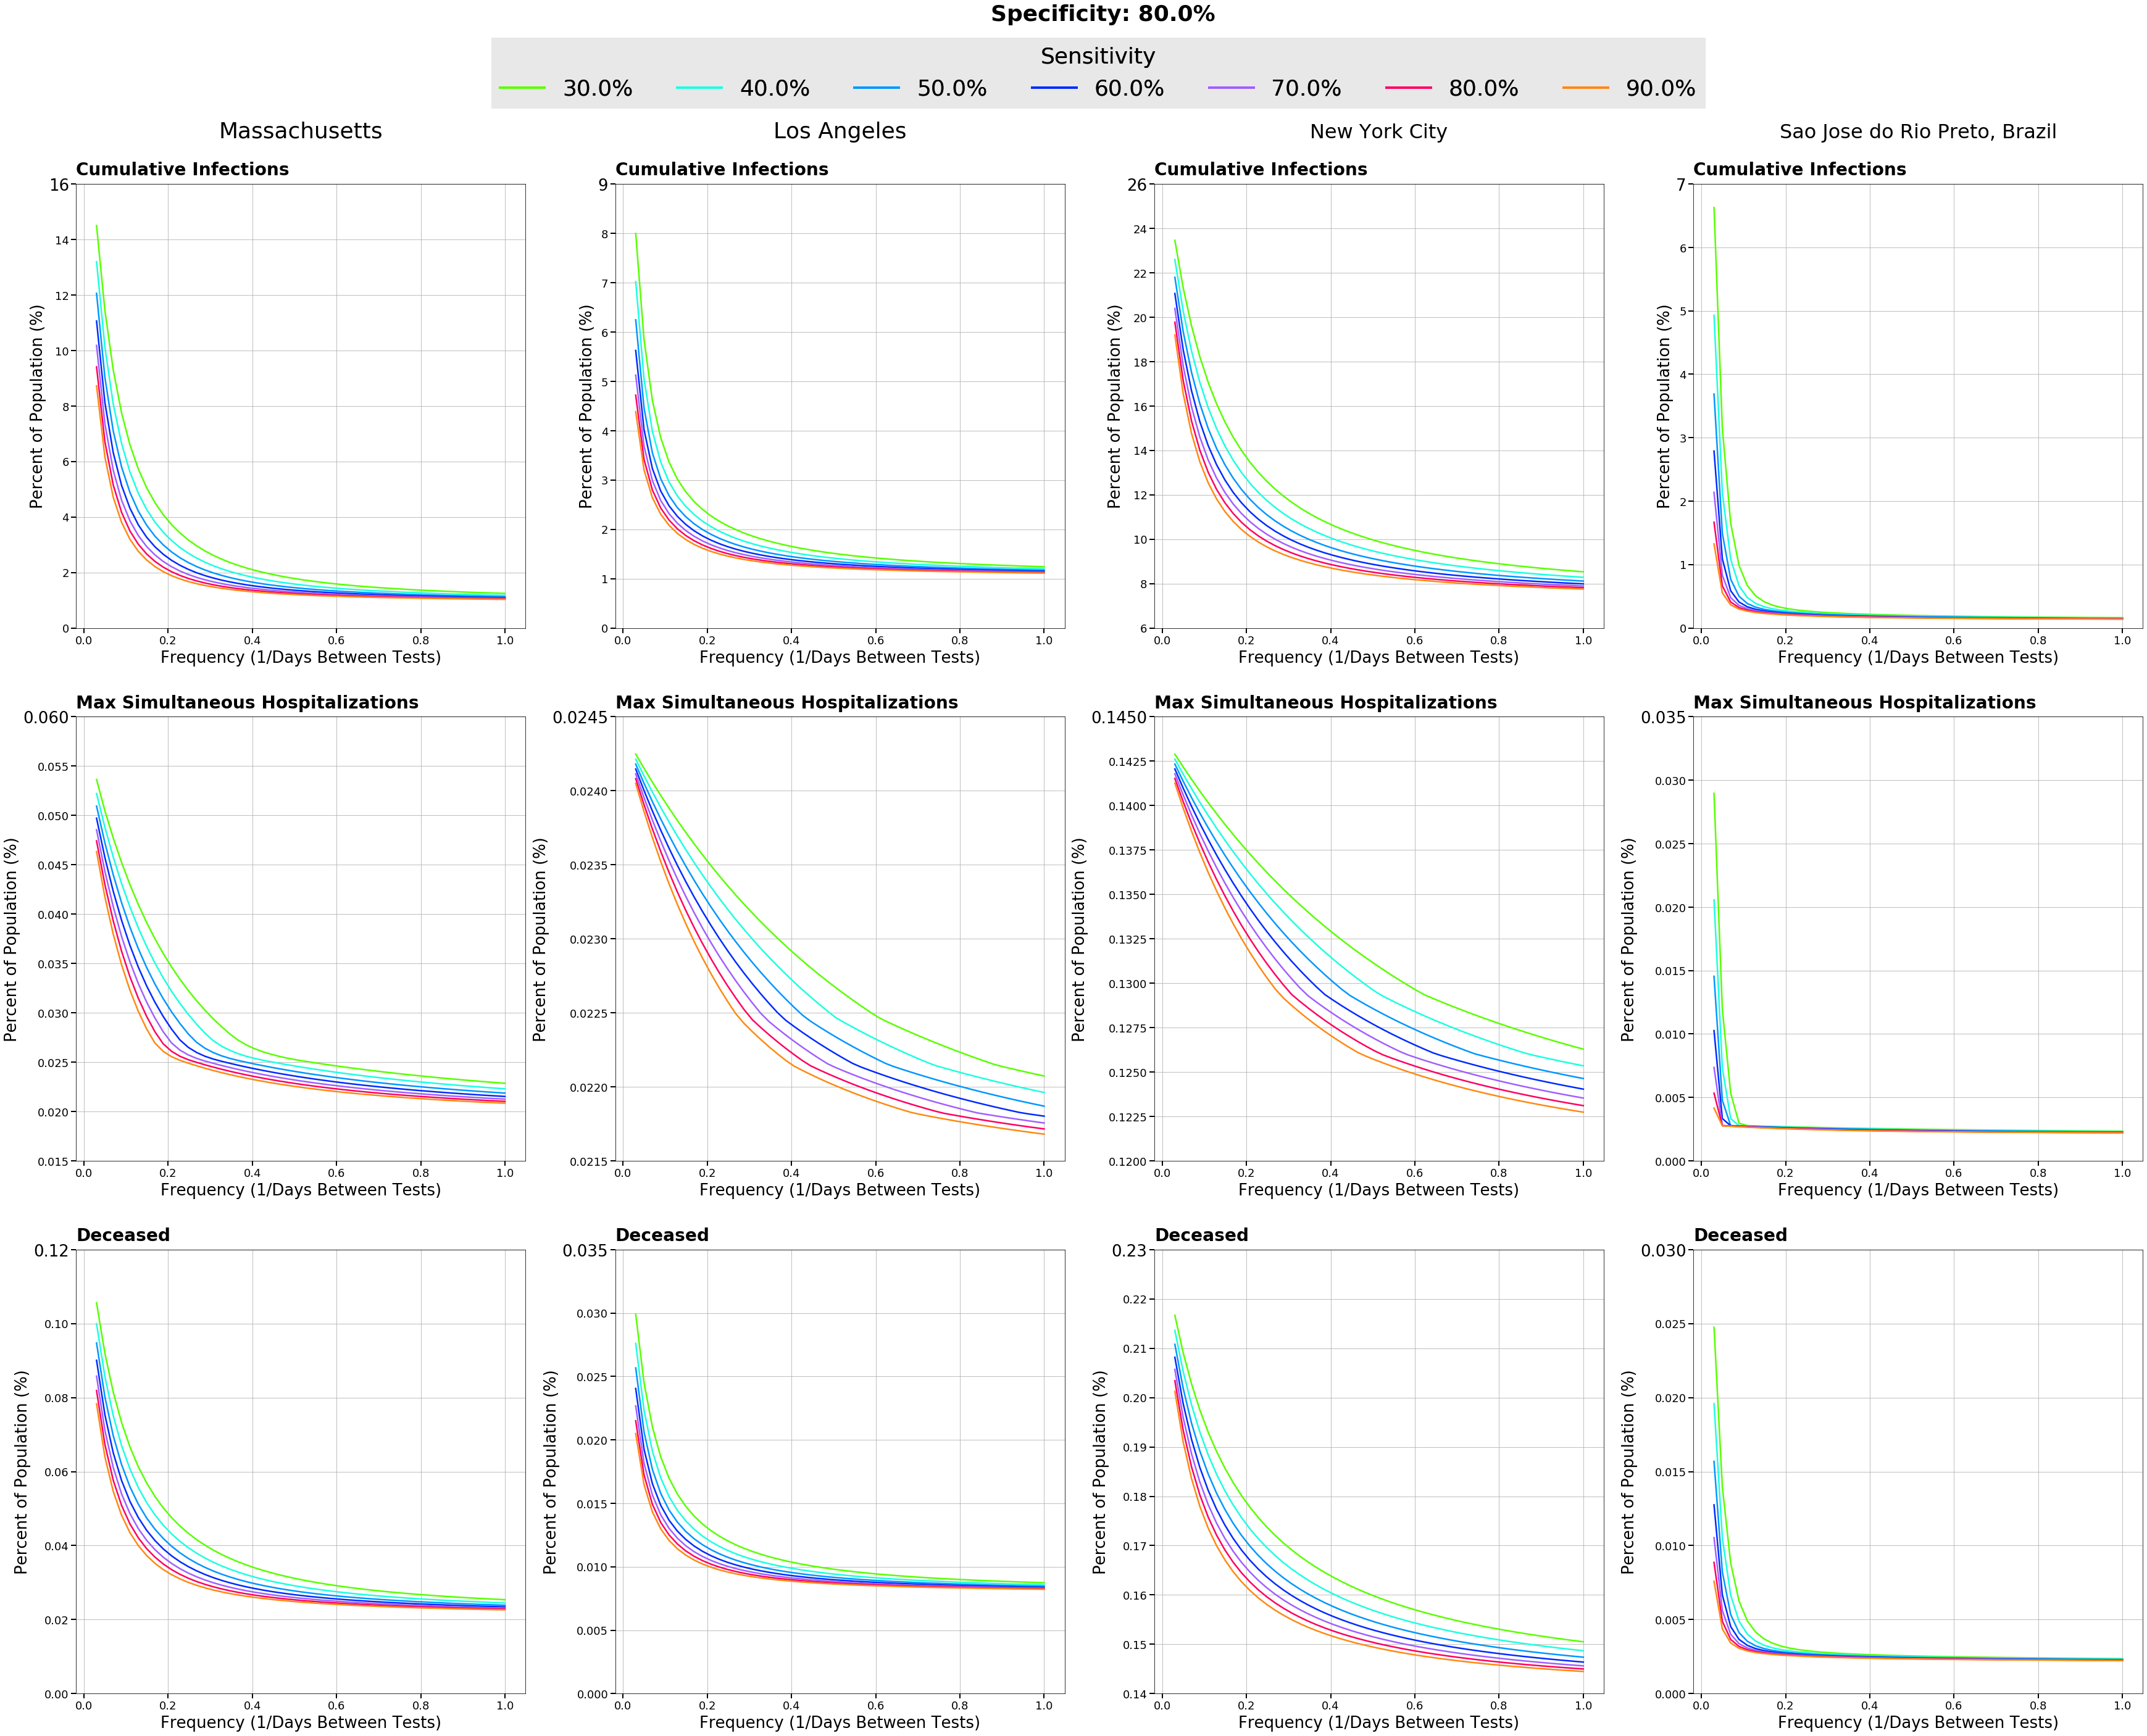

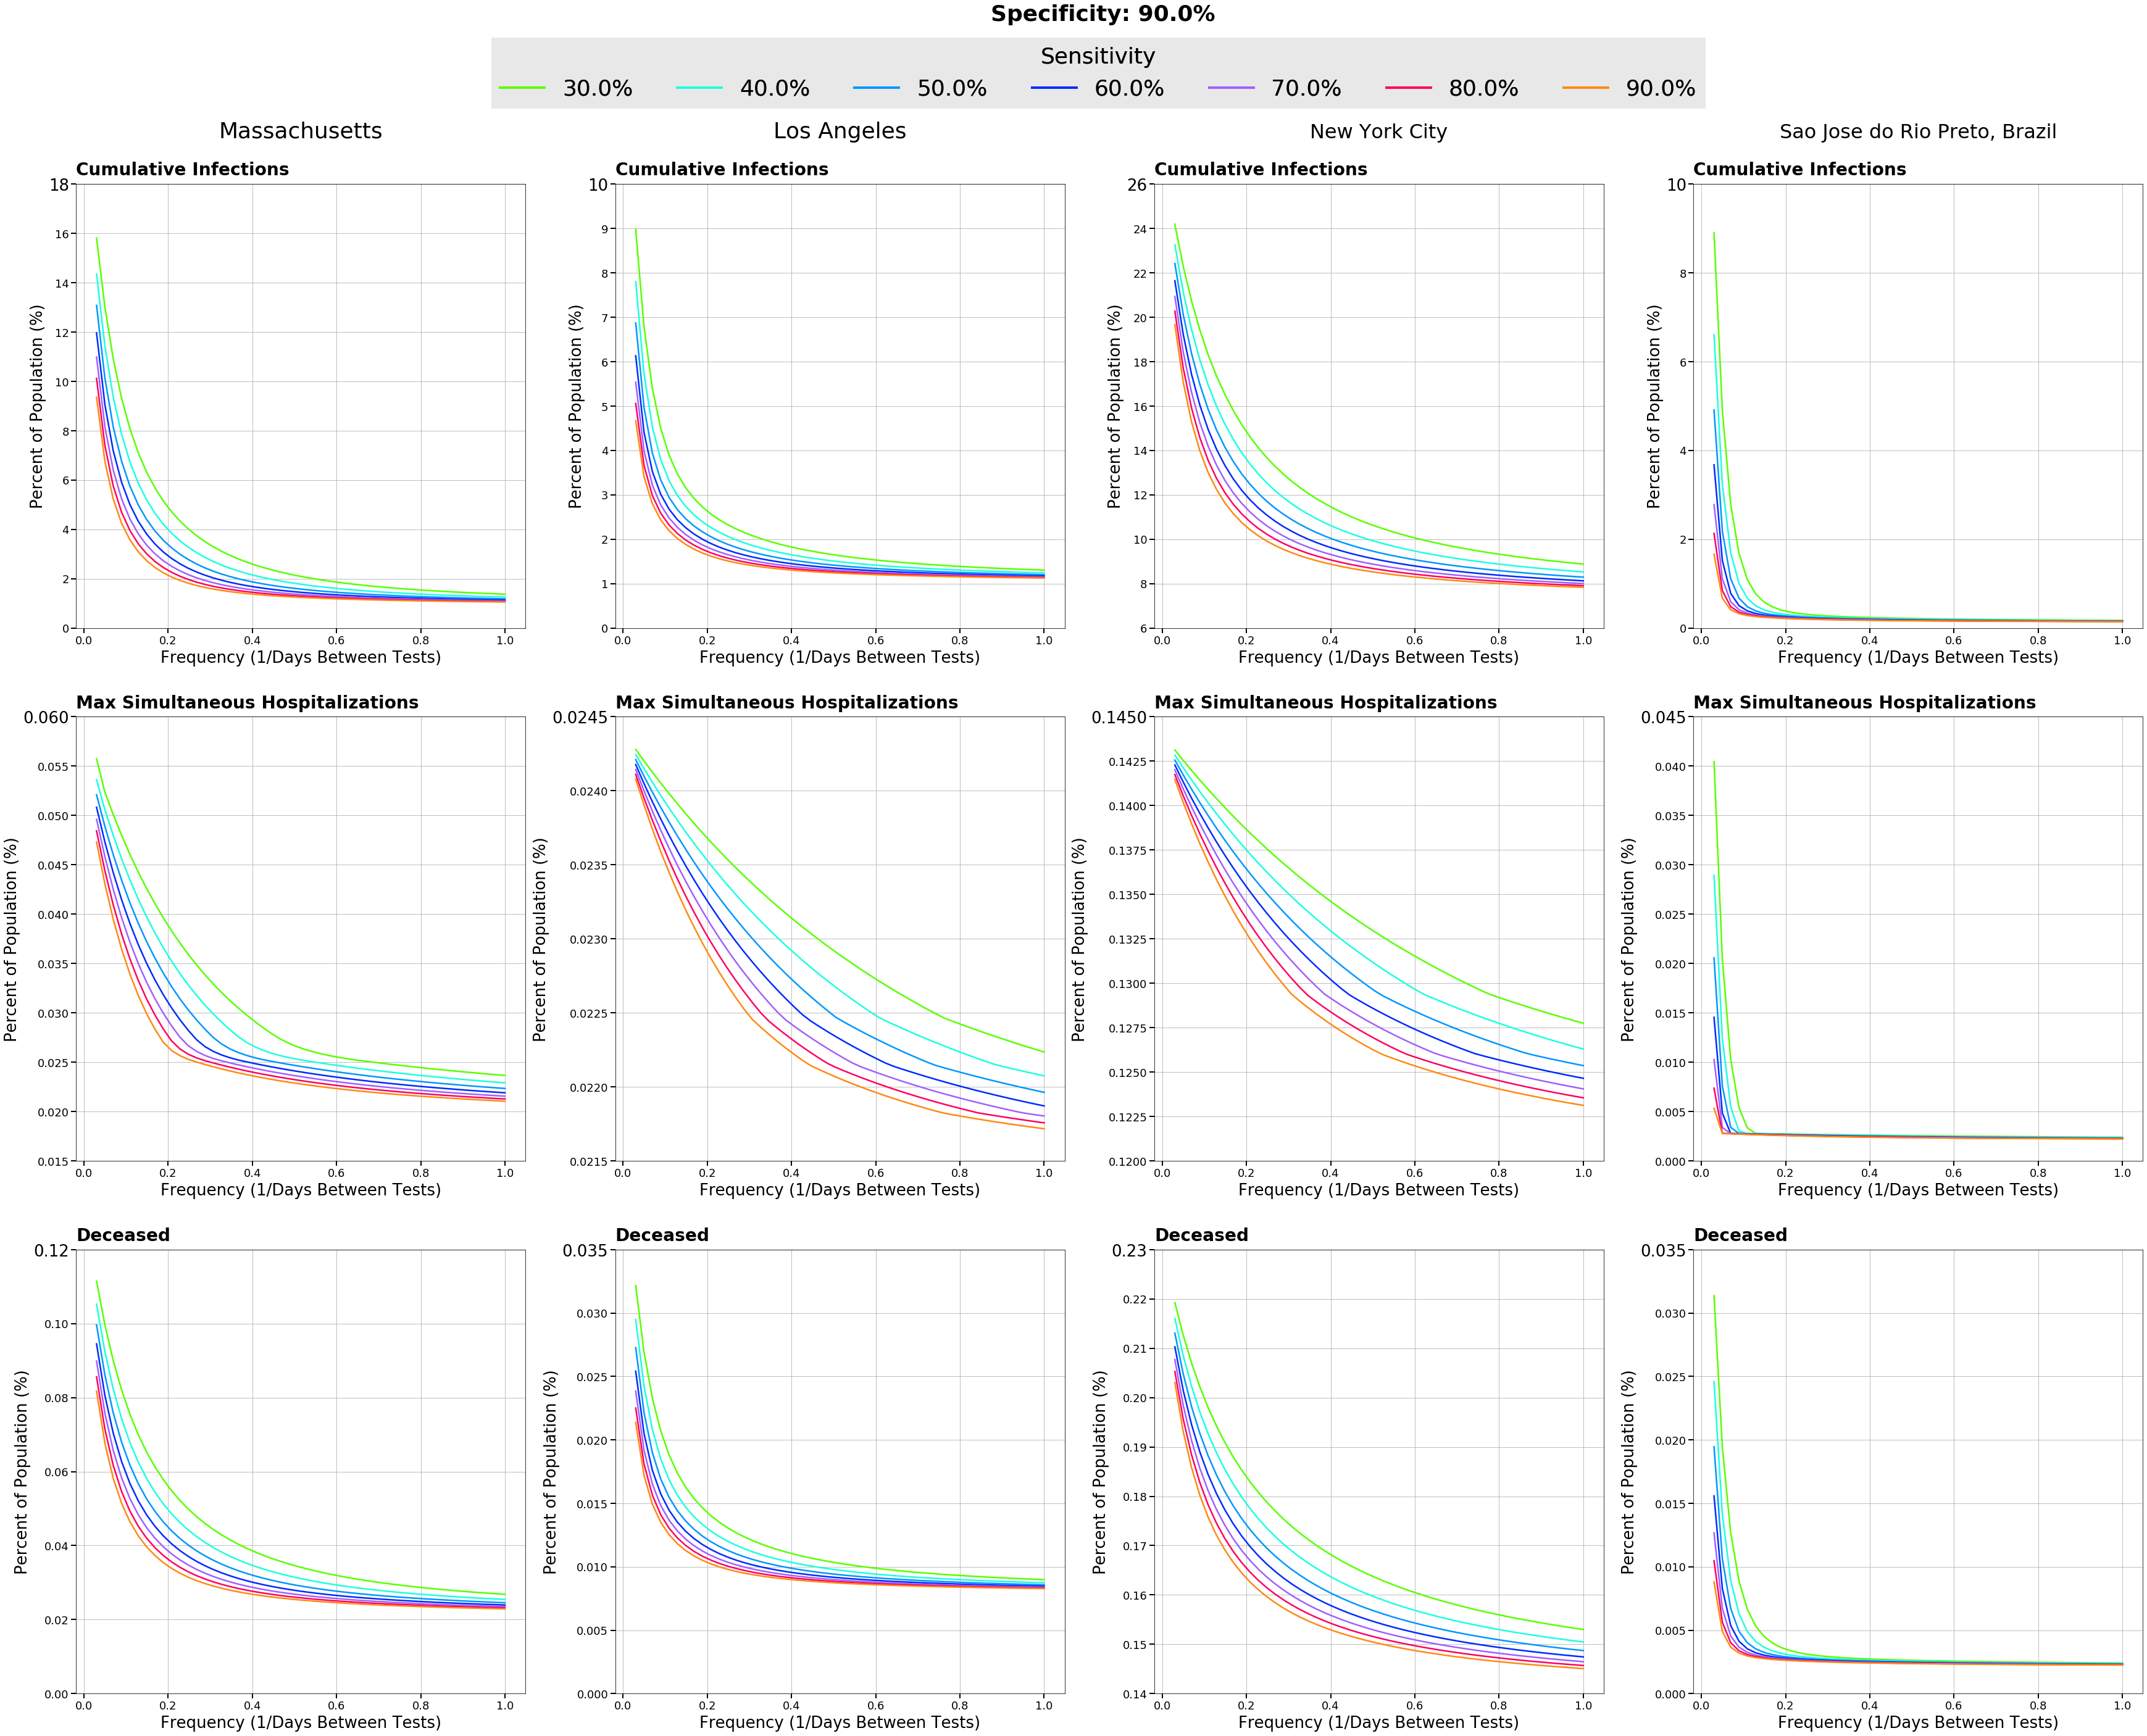

In [10]:


        
for sp in range(len(specs)):
    
    fig = plt.figure(figsize=(45*(4/3),45))

    spec = specs[sp]
    plt.suptitle("Specificity: {}%".format(np.around(100*spec,0)),fontsize=36,y=0.97,x=0.51,fontweight='bold')

    fig,ax0 = make_fig(fig,fig.add_subplot(3,4,1))
    
    for key, sts in fScan.items():
        ax0.plot(freq_fScan,sts['total'][sp],label=str(np.around(100*key,0))+'%')
    ax0.text(0.0,1.02,'Cumulative Infections',horizontalalignment='left',transform=ax0.transAxes,fontsize=28,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#     ax0.legend(title = "Sensitivity (%)", title_fontsize=28,fontsize=28,ncol=3,loc="upper right",facecolor='white', framealpha=0.8,edgecolor='None') #0.36,0.81
    ax0.set_title("Massachusetts",fontsize=36,pad=75.0)
    ax0.set_ylim(bottom=0)
    
    ticks = list(ax0.get_yticks())

    ax0.set_yticks(ticks)



    ax0.yaxis.get_major_ticks()[-1].label1.set_fontsize(26)
    
    ax0.set_ylim(bottom=0)
    

    plt.grid()


    fig,ax0 = make_fig(fig,fig.add_subplot(3,4,2))
    ls = []
    lbels = []
    for key, sts in fScanLA.items():
        l2 = ax0.plot(freq_fScanLA,sts['total'][sp],label=str(np.around(100*key,0))+'%')
        c2 = l2[0].get_color()
        l4 = Line2D([0],[0],color=c2,lw=4)
        ls.append(l4)
        lbels.append(str(np.around(100*key,0))+'%')
    ax0.text(0.0,1.02,'Cumulative Infections',horizontalalignment='left',transform=ax0.transAxes,fontsize=28,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
    leg = fig.legend(handles = ls, labels = lbels,title = "Sensitivity", title_fontsize=36,fontsize=36,ncol=len(ls),loc="upper left",bbox_to_anchor=(0.18,0.855),facecolor='lightgray', framealpha=0.3,edgecolor='None',fancybox=False) #0.36,0.81
#     leg1 = fig.legend(handles = ls, labels = lbels,title = "Sensitivity", title_fontsize=36,fontsize=36,ncol=len(ls),loc="upper left",bbox_to_anchor=(0.2,0.105),facecolor='white', framealpha=0.8,edgecolor='None') #0.36,0.81
    fig.add_artist(leg)
#     fig.add_artist(leg1)
    ax0.set_title("Los Angeles",fontsize=36,pad=75.0)

    
    ticks = list(ax0.get_yticks())

    ax0.set_yticks(ticks)

    ax0.yaxis.get_major_ticks()[-1].label1.set_fontsize(26)
    
    ax0.set_ylim(bottom=0)
    
    plt.grid()


    fig,ax0 = make_fig(fig,fig.add_subplot(3,4,3))
    for key, sts in fScanNYC.items():
        ax0.plot(freq_fScanNYC,sts['total'][sp],label=str(np.around(100*key,0))+'%')
    ax0.text(0.0,1.02,'Cumulative Infections',horizontalalignment='left',transform=ax0.transAxes,fontsize=28,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#     ax0.legend(title = "Sensitivity (%)", title_fontsize=28,fontsize=28,ncol=3,loc="upper right",facecolor='white', framealpha=0.8,edgecolor='None') #0.36,0.81
    ax0.set_title("New York City",fontsize=32,pad=75.0)

    
    ticks = list(ax0.get_yticks())

    ax0.set_yticks(ticks)
    # ax0.yaxis.get_major_ticks()[-1].label1.set_fontweight('bold')
    ax0.yaxis.get_major_ticks()[-1].label1.set_fontsize(26)
    plt.grid()
    

    fig,ax0 = make_fig(fig,fig.add_subplot(3,4,4))
    for key, sts in fScanBrazil.items():
        ax0.plot(freq_fScanBrazil,sts['total'][sp],label=str(np.around(100*key,0))+'%')
    ax0.text(0.0,1.02,'Cumulative Infections',horizontalalignment='left',transform=ax0.transAxes,fontsize=28,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#     ax0.legend(title = "Sensitivity (%)", title_fontsize=28,fontsize=28,ncol=3,loc="upper right",facecolor='white', framealpha=0.8,edgecolor='None') #0.36,0.81
    ax0.set_title("Sao Jose do Rio Preto, Brazil",fontsize=32,pad=75.0)
    ax0.set_ylim(bottom=0)

    
    ticks = list(ax0.get_yticks())

    ax0.set_yticks(ticks)
    # ax0.yaxis.get_major_ticks()[-1].label1.set_fontweight('bold')
    ax0.yaxis.get_major_ticks()[-1].label1.set_fontsize(26)
    


    plt.grid()


    fig,ax0 = make_fig(fig,fig.add_subplot(3,4,5))
    for key, sts in fScan.items():
        ax0.plot(freq_fScan,sts['H'][sp],label=str(np.around(100*key,0))+'%')
    ax0.text(0.0,1.02,'Max Simultaneous Hospitalizations',horizontalalignment='left',transform=ax0.transAxes,fontsize=28,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#     ax0.legend(title = "Sensitivity (%)", title_fontsize=28,fontsize=28,ncol=3,loc="upper right",facecolor='white', framealpha=0.8,edgecolor='None') #0.36,0.81
    # top = ax0.get_ybound()[1]+ax0.margins()[1]*(ax0.get_ybound()[1]-ax0.get_ybound()[0])
    
    ticks = list(ax0.get_yticks())

    ax0.set_yticks(ticks)

    # ax0.set_ylim(bottom=0)
    ax0.yaxis.get_major_ticks()[-1].label1.set_fontsize(26)

    


    # print(ax0.get_yticks())
    
    plt.grid()


    fig,ax0 = make_fig(fig,fig.add_subplot(3,4,6))
    for key, sts in fScanLA.items():
        ax0.plot(freq_fScanLA,sts['H'][sp],label=str(np.around(100*key,0))+'%')
    ax0.text(0.0,1.02,'Max Simultaneous Hospitalizations',horizontalalignment='left',transform=ax0.transAxes,fontsize=28,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
    #ax0.legend(title = "Sensitivity (%)", title_fontsize=28,fontsize=28,ncol=3,loc="upper right",facecolor='white', framealpha=0.8,edgecolor='None') #0.36,0.81
    
    ticks = list(ax0.get_yticks())

    ax0.set_yticks(ticks)
    # ax0.set_ylim(bottom=0)

    ax0.yaxis.get_major_ticks()[-1].label1.set_fontsize(26)
    

    plt.grid()


    fig,ax0 = make_fig(fig,fig.add_subplot(3,4,7))
    for key, sts in fScanNYC.items():
        ax0.plot(freq_fScanNYC,sts['H'][sp],label=str(np.around(100*key,0))+'%')
    ax0.text(0.0,1.02,'Max Simultaneous Hospitalizations',horizontalalignment='left',transform=ax0.transAxes,fontsize=28,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#     ax0.legend(title = "Sensitivity (%)", title_fontsize=28,fontsize=28,ncol=3,loc="upper right",facecolor='white', framealpha=0.8,edgecolor='None') #0.36,0.81
    ticks = list(ax0.get_yticks())

    ax0.set_yticks(ticks)

    # ax0.set_ylim(bottom=0)
    ax0.yaxis.get_major_ticks()[-1].label1.set_fontsize(26)
    
    plt.grid()


    fig,ax0 = make_fig(fig,fig.add_subplot(3,4,8))
    for key, sts in fScanBrazil.items():
        ax0.plot(freq_fScanBrazil,sts['H'][sp],label=str(np.around(100*key,0))+'%')
    ax0.text(0.0,1.02,'Max Simultaneous Hospitalizations',horizontalalignment='left',transform=ax0.transAxes,fontsize=28,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#     ax0.legend(title = "Sensitivity (%)", title_fontsize=28,fontsize=28,ncol=3,loc="upper right",facecolor='white', framealpha=0.8,edgecolor='None') #0.36,0.81
    ax0.set_ylim(bottom=0)
    
    ticks = list(ax0.get_yticks())

    ax0.set_yticks(ticks)

    # ax0.set_ylim(bottom=0)
    ax0.yaxis.get_major_ticks()[-1].label1.set_fontsize(26)
    plt.grid()

    fig,ax0 = make_fig(fig,fig.add_subplot(3,4,9))
    for key, sts in fScan.items():
        ax0.plot(freq_fScan,sts['E'][sp],label=str(np.around(100*key,0))+'%')
    ax0.set_ylim(bottom=0)
    ax0.text(0.0,1.02,'Deceased',horizontalalignment='left',transform=ax0.transAxes,fontsize=28,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#     ax0.legend(title = "Sensitivity (%)", title_fontsize=28,fontsize=28,ncol=3,loc="upper right",facecolor='white', framealpha=0.8,edgecolor='None') #0.36,0.81
    # ax0.set_ylim(bottom=0)
    ticks = list(ax0.get_yticks())

    ax0.set_yticks(ticks)


    ax0.yaxis.get_major_ticks()[-1].label1.set_fontsize(26)
    
    ax0.set_ylim(bottom=0)
    plt.grid()


    fig,ax0 = make_fig(fig,fig.add_subplot(3,4,10))
    for key, sts in fScanLA.items():
        ax0.plot(freq_fScanLA,sts['E'][sp],label=str(np.around(100*key,0))+'%')
    ax0.set_ylim(bottom=0)
    ax0.text(0.0,1.02,'Deceased',horizontalalignment='left',transform=ax0.transAxes,fontsize=28,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#     ax0.legend(title = "Sensitivity (%)", title_fontsize=28,fontsize=28,ncol=3,loc="upper right",facecolor='white', framealpha=0.8,edgecolor='None') #0.36,0.81
    ax0.set_ylim(bottom=0)
    
    # ax0.set_ylim(bottom=0)
    ticks = list(ax0.get_yticks())

    ax0.set_yticks(ticks)

    ax0.yaxis.get_major_ticks()[-1].label1.set_fontsize(26)
    
    
    plt.grid()


    fig,ax0 = make_fig(fig,fig.add_subplot(3,4,11))
    for key, sts in fScanNYC.items():
        ax0.plot(freq_fScanNYC,sts['E'][sp],label=str(np.around(100*key,0))+'%')
#     ax0.set_ylim(bottom=0)
    ax0.text(0.0,1.02,'Deceased',horizontalalignment='left',transform=ax0.transAxes,fontsize=28,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#     ax0.legend(title = "Sensitivity (%)", title_fontsize=28,fontsize=28,ncol=3,loc="upper right",facecolor='white', framealpha=0.8,edgecolor='None') #0.36,0.81
    
    
    ticks = list(ax0.get_yticks())

    ax0.set_yticks(ticks)


    ax0.yaxis.get_major_ticks()[-1].label1.set_fontsize(26)
    
    


    plt.grid()
    

    fig,ax0 = make_fig(fig,fig.add_subplot(3,4,12))
    for key, sts in fScanBrazil.items():
        ax0.plot(freq_fScanBrazil,sts['E'][sp],label=str(np.around(100*key,0))+'%')
    ax0.text(0.0,1.02,'Deceased',horizontalalignment='left',transform=ax0.transAxes,fontsize=28,bbox=dict(facecolor='white',fill=True, alpha=0.8,edgecolor='None'),fontweight='bold')
#     ax0.legend(title = "Sensitivity (%)", title_fontsize=28,fontsize=28,ncol=3,loc="upper right",facecolor='white', framealpha=0.8,edgecolor='None') #0.36,0.81
    ax0.set_ylim(bottom=0)
    
    # ax0.set_ylim(bottom=0)
    ticks = list(ax0.get_yticks())

    ax0.set_yticks(ticks)

    ax0.yaxis.get_major_ticks()[-1].label1.set_fontsize(26)
    

    plt.grid()



    plt.savefig(outDir + "/" + place + "-vs-freq-logscale"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".pdf", bbox_inches="tight")
    plt.savefig(outDir + "/" + place + "-vs-freq-logscale"+str(int(10*sens))+"sens-"+str(int(10*spec))+"spec"+".png", bbox_inches="tight")
    # pdf.savefig(fig,bbox_inches="tight")